<a href="https://www.kaggle.com/code/dataranch/queen-tweets-feature-importance-28-models?scriptVersionId=106683885" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <div style="text-align: center; background-color: blue; color: white; padding: 14px; line-height: 1;border-radius:20px">**🐦Queen Tweets Model Comparison + Feature Importance 📊**</div>
- Preprocessing
    - Detect continuous and categorical variables.
    - Normalize and impute data.
    

- For every target variable in the dataset:
    - Compare performance on 27 models + a TabNet model.
    - Output model performance and processed data in CSV format for every dataset.
    - Save plots + CSVs of XGBoost Feature Importances.
    - Save best performing FastAI model.

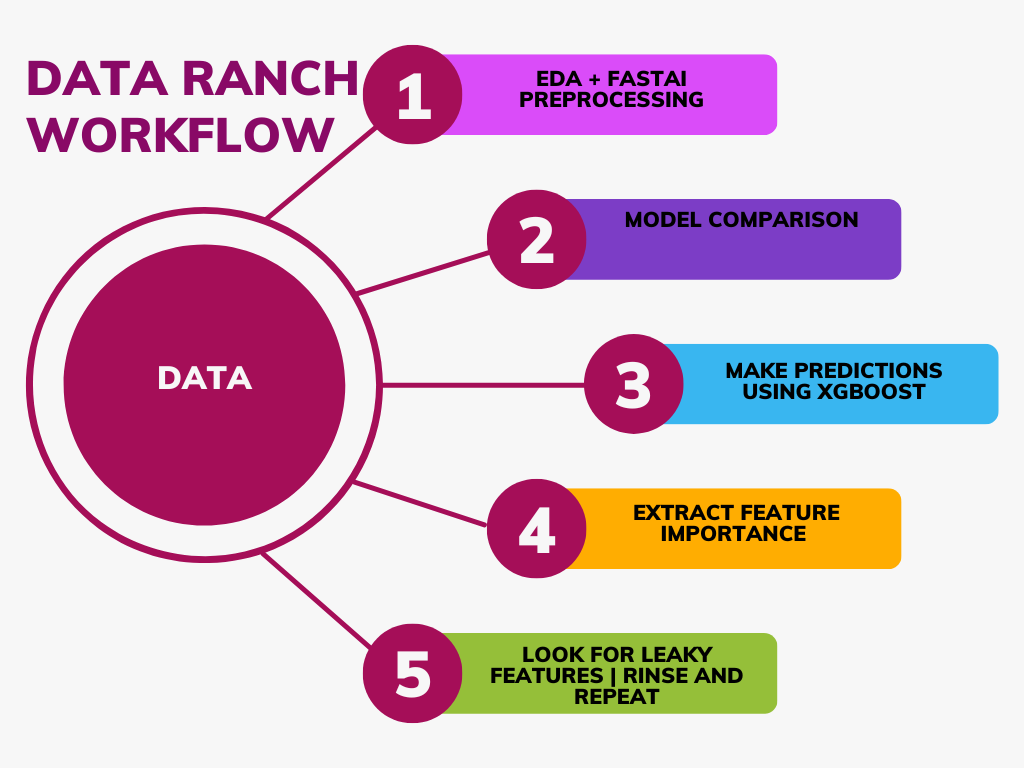

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install lazypredict

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 248.1/248.1 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.9/25.9 MB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 45.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 36.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 269.4/269.4 kB 19.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.0/303.0 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.8/82.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.6/127.6 MB 7.4 MB/s eta 0:00:00
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86

In [3]:
!pip install --upgrade pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 21.0 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.0.5
    Uninstalling pandas-1.0.5:
      Successfully uninstalled pandas-1.0.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
beatrix-jupyterlab 3.1.7 requires google-cloud-bigquery-storage, which is not installed.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.19.1 which is incompatible.
tfx-bsl 1.9.0 requires pyarrow<6,>=1, but you have pyarrow 8.0.0 which is incompatible.
tfx-bsl 1.9.0 requires tensorflow!=2.0.*,!=2.1.*,!=2.2.*,!=2.3.*,!=2.4.*,!=2.5.*,!=2.6.*,!=2.7.*,!=2.8.*,<3,>=1.15.5, but you have tensorflow 2.6.4 which is incompatible.
tensorflow-transform 1.9.0 requires pyarrow<6,>=1, but you have pyarrow 8.0.0 which is incompatible.
tensorflow-transform 1.9.0 requires tensorflow!=2.

In [4]:
!pip install fast-tabnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 1.2 MB/s eta 0:00:00


In [5]:
!pip install fastai

  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.3.0
    Uninstalling typing_extensions-4.3.0:
      Successfully uninstalled typing_extensions-4.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-io 0.21.0 requires tensorflow-io-gcs-filesystem==0.21.0, which is not installed.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.19.1 which is incompatible.
tensorflow 2.6.4 requires h5py~=3.1.0, but you have h5py 3.7.0 which is incompatible.
tensorflow 2.6.4 requires numpy~=1.19.2, but you have numpy 1.19.1 which is incompatible.
tensorflow 2.6.4 requires tensorboard<2.7,>=2.6.0, but you have tensorboard 2.10.0 which is incompatible.
tensorflow 2.6.4 requires typing-extensions<3.11,>=3.7, but you have typing-extensions 4.1.1 which is incompatible.
tensorflow-transform 1.9.0 requires pyarrow<6,

In [6]:
#A program that takes a csv and trains models on it. Streamlined model selection.
#==============================================================================

#LazyPredict
import lazypredict
from lazypredict.Supervised import LazyRegressor
from lazypredict.Supervised import LazyClassifier
#Baysian Optimization
from bayes_opt import BayesianOptimization
#Pandas stack
import pandas as pd
import numpy as np
#FastAI
from fastai.tabular.all import *
from fastai.tabular.core import *
#Plots
import matplotlib.pyplot as plt
import seaborn as sns
#System
import os
import sys
import traceback
#Fit an xgboost model
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
#Random
import random

#TabNet
from fast_tabnet.core import *

import shutil

In [7]:
#Project Variables
#===================================================================================================
PROJECT_NAME = 'tweets-after-queen-elizabeth-iis-death'
VARIABLE_FILES = False
#Maximum amount of rows to take
SAMPLE_COUNT = 20000
FASTAI_LEARNING_RATE = 1e-1
AUTO_ADJUST_LEARNING_RATE = False
#Set to True automatically infer if variables are categorical or continuous
ENABLE_BREAKPOINT = True
#When trying to declare a column a continuous variable, if it fails, convert it to a categorical variable
CONVERT_TO_CAT = False
REGRESSOR = True
SEP_DOLLAR = True
SEP_PERCENT = True
SHUFFLE_DATA = True

In [8]:
input_dir = f'../input/{PROJECT_NAME}'
param_dir = f'/kaggle/working/{PROJECT_NAME}'
TARGET = ''
PARAM_DIR = param_dir
print(f'param_dir: {param_dir}')
if not os.path.exists(param_dir):
    os.makedirs(param_dir)
#rename any file in param_dir/file that ends with csv to data.csv
for file in os.listdir(input_dir):
    if file.endswith('.csv'):
        print('CSV!')
        if 'classification_results' not in file and 'regression_results' not in file:
            #os.rename(f'{input_dir}/{file}', f'{param_dir}/data.csv')
            shutil.copy(f'{input_dir}/{file}', f'{param_dir}/data.csv')
        #os.rename(f'{param_dir}/{file}', f'{param_dir}/data.csv')
try:
    df = pd.read_csv(f'{param_dir}/data.csv', nrows=SAMPLE_COUNT)
except:
    print(f'Please place a file named data.csv in {param_dir}')
    #sys.exit()

param_dir: /kaggle/working/tweets-after-queen-elizabeth-iis-death
CSV!


In [9]:
df

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1568167503947235331,1568167503947235331,2022-09-09 14:50:42 India Standard Time,2022-09-09,14:50:42,530,963099618547589121,inpd_,In Professional Development,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1568167501334253568,1568167501334253568,2022-09-09 14:50:42 India Standard Time,2022-09-09,14:50:42,530,26475981,ukpostbox,UK Postbox,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1568167500134731776,1568167500134731776,2022-09-09 14:50:41 India Standard Time,2022-09-09,14:50:41,530,868028006610153472,brandminds,BRAND MINDS,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1568167499320987648,1568167499320987648,2022-09-09 14:50:41 India Standard Time,2022-09-09,14:50:41,530,340163485,nxcoventry,NX Coventry,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1568167498410778631,1568167498410778631,2022-09-09 14:50:41 India Standard Time,2022-09-09,14:50:41,530,19282280,metoffice,Met Office,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1568137951661416448,1568137951661416448,2022-09-09 12:53:16 India Standard Time,2022-09-09,12:53:16,530,1418880756928102400,averageyanker,Average Yanker,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
19996,1568137945793667073,1568137945793667073,2022-09-09 12:53:15 India Standard Time,2022-09-09,12:53:15,530,1307326932,sommeassoc,Somme Association,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
19997,1568137945214771200,1568137945214771200,2022-09-09 12:53:15 India Standard Time,2022-09-09,12:53:15,530,1539908878971838467,luceroporquiado,William Porquiado Lucero,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
19998,1568137943960940544,1568137943960940544,2022-09-09 12:53:15 India Standard Time,2022-09-09,12:53:15,530,1382439517525659648,milk_y,injun,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [10]:
df.isna().sum()

id                     0
conversation_id        0
created_at             0
date                   0
time                   0
timezone               0
user_id                0
username               0
name                   1
place              19987
tweet                  0
language               0
mentions               0
urls                   0
photos                 0
replies_count          0
retweets_count         0
likes_count            0
hashtags               0
cashtags               0
link                   0
retweet                0
quote_url          18796
video                  0
thumbnail           9733
near               20000
geo                20000
source             20000
user_rt_id         20000
user_rt            20000
retweet_id         20000
reply_to               0
retweet_date       20000
translate          20000
trans_src          20000
trans_dest         20000
dtype: int64

<AxesSubplot:>

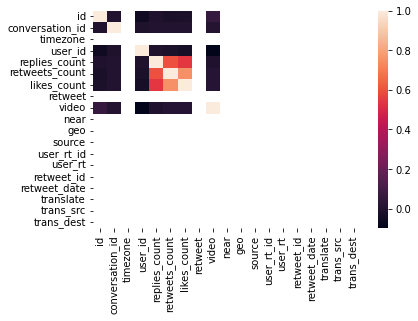

In [11]:
sns.heatmap(df.corr())

In [12]:
df.head().style.background_gradient(cmap = "inferno")

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1568167503947235331,1568167503947235331,2022-09-09 14:50:42 India Standard Time,2022-09-09,14:50:42,530,963099618547589121,inpd_,In Professional Development,nan,We at In Professional Development join with people across the United Kingdom and around the world in mourning the death of Her Majesty Queen Elizabeth II. We extend our deepest condolences to His Majesty and to all members of the Royal Family. https://t.co/m61LCMg66Q https://t.co/YxLmbEarrB,en,[],['https://www.inpd.co.uk/blog/a-statement-from-our-ceo-dave-hall'],['https://pbs.twimg.com/media/FcM_yTPWQAAqAck.jpg'],0,0,0,[],[],https://twitter.com/INPD_/status/1568167503947235331,False,nan,1,https://pbs.twimg.com/media/FcM_yTPWQAAqAck.jpg,nan,nan,nan,nan,nan,nan,[],nan,nan,nan,nan
1,1568167501334253568,1568167501334253568,2022-09-09 14:50:42 India Standard Time,2022-09-09,14:50:42,530,26475981,ukpostbox,UK Postbox,nan,"Join us in remembering Her Majesty Queen Elizabeth II, whose passing has brought great sadness to the team here at UK Postbox. We pass our condolences to the Royal Family and anyone affected during this difficult time. https://t.co/T800hclNJo",en,[],[],['https://pbs.twimg.com/media/FcM_7H_XgAEDifo.jpg'],0,0,0,[],[],https://twitter.com/UKPostbox/status/1568167501334253568,False,nan,1,https://pbs.twimg.com/media/FcM_7H_XgAEDifo.jpg,nan,nan,nan,nan,nan,nan,[],nan,nan,nan,nan
2,1568167500134731776,1568167500134731776,2022-09-09 14:50:41 India Standard Time,2022-09-09,14:50:41,530,868028006610153472,brandminds,BRAND MINDS,nan,"""When life seems hard, the courageous do not lie down and accept defeat; instead, they are all the more determined to struggle for a better future."" - Queen Elizabeth II (1926-2022) #queenelizabeth #worldchanger #leadership https://t.co/74X7t8a3Ax",en,[],[],['https://pbs.twimg.com/media/FcNABxgWIAAyuK2.jpg'],0,0,0,"['queenelizabeth', 'worldchanger', 'leadership']",[],https://twitter.com/brandminds/status/1568167500134731776,False,nan,1,https://pbs.twimg.com/media/FcNABxgWIAAyuK2.jpg,nan,nan,nan,nan,nan,nan,[],nan,nan,nan,nan
3,1568167499320987648,1568167499320987648,2022-09-09 14:50:41 India Standard Time,2022-09-09,14:50:41,530,340163485,nxcoventry,NX Coventry,nan,"We join the nation in mourning the death of Her Majesty Queen Elizabeth II. Our heartfelt thoughts are with the Royal Family, the Nation and the Commonwealth at this time. https://t.co/r8H56ZhUCc",en,[],[],['https://pbs.twimg.com/media/FcNAB9aX0AA4-Le.jpg'],0,0,0,[],[],https://twitter.com/nxcoventry/status/1568167499320987648,False,nan,1,https://pbs.twimg.com/media/FcNAB9aX0AA4-Le.jpg,nan,nan,nan,nan,nan,nan,[],nan,nan,nan,nan
4,1568167498410778631,1568167498410778631,2022-09-09 14:50:41 India Standard Time,2022-09-09,14:50:41,530,19282280,metoffice,Met Office,nan,We are saddened by the death of Her Majesty Queen Elizabeth II. Our thoughts are with her family and all those affected by this news. As a mark of respect during this time of national mourning we will only be posting daily forecasts and warnings.,en,[],[],[],1,0,0,[],[],https://twitter.com/metoffice/status/1568167498410778631,False,nan,0,nan,nan,nan,nan,nan,nan,nan,[],nan,nan,nan,nan


In [13]:
df.describe().T.style.background_gradient(cmap = "viridis")

,count,mean,std,min,25%,50%,75%,max
id,20000.00,1568152953669132032.00,8424665672774.32,1568137941360463872.00,1568145837152244736.00,1568152986649602048.00,1568160315564490752.00,1568167503947235328.00
conversation_id,20000.00,1567822174798456320.00,11839537561760948.00,695773136344592384.00,1568144688465601536.00,1568152232807288832.00,1568159824498744320.00,1568167503947235328.00
timezone,20000.00,530.00,0.00,530.00,530.00,530.00,530.00,530.00
user_id,20000.00,571639429959498240.00,641571999402864896.00,47973.00,324594530.75,3212328888.50,1260627491857861632.00,1568164808561950720.00
replies_count,20000.00,0.37,7.97,0.00,0.00,0.00,0.00,1053.00
retweets_count,20000.00,0.72,6.63,0.00,0.00,0.00,0.00,355.00
likes_count,20000.00,4.24,59.26,0.00,0.00,0.00,1.00,5270.00
video,20000.00,0.51,0.50,0.00,0.00,1.00,1.00,1.00
near,0.00,nan,nan,nan,nan,nan,nan,nan
geo,0.00,nan,nan,nan,nan,nan,nan,nan


In [14]:
df.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [15]:
#Remove leaky features
leaky_features = ['id', 'conversation_id', 'user_id', 'date', 'time', 'username', 'name', 'tweet', 'link']
for feature in leaky_features:
    del(df[feature])

Target Variable: trans_dest
CATS=====================
['timezone', 'place', 'language', 'replies_count', 'retweets_count', 'likes_count', 'cashtags', 'retweet', 'quote_url', 'video', 'near', 'geo', 'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src', 'trans_dest', 'reply_to_no_dollar', 'reply_to_no_percent', 'reply_to_no_dollar_no_percent']
CONTS=====================
['created_at', 'mentions', 'urls', 'photos', 'hashtags', 'thumbnail', 'urls_no_percent']
31
Could not convert created_at to float.
Could not convert mentions to float.
Could not convert urls to float.
Could not convert photos to float.
Could not convert hashtags to float.
Could not convert thumbnail to float.
Could not convert urls_no_percent to float.
Looping through continuous variables to find breakpoint
Error with  created_at
Error with  mentions
Error with  urls
Error with  photos
Error with  hashtags
Error with  thumbnail
Error with  urls_no_percent
Continuous variabl

  0%|          | 0/42 [00:00<?, ?it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.040326595306396484}


 12%|█▏        | 5/42 [00:00<00:01, 21.45it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.05939173698425293}
{'Model': 'BayesianRidge', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.04393744468688965}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.04607701301574707}
{'Model': 'DummyRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.04343366622924805}
{'Model': 'ElasticNet', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.20275616645812988}


 19%|█▉        | 8/42 [00:01<00:07,  4.29it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 1.0109570026397705}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.04689478874206543}


 24%|██▍       | 10/42 [00:01<00:06,  5.19it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.1751561164855957}
{'Model': 'GammaRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.032431602478027344}


 26%|██▌       | 11/42 [01:15<07:11, 13.93s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 0.08282224622151, 'Time taken': 74.08668422698975}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.04803347587585449}


 31%|███       | 13/42 [01:16<04:24,  9.13s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.15386080741882324}
{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.06027984619140625}


 36%|███▌      | 15/42 [01:17<02:51,  6.34s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 6.1876306131454896e-12, 'Time taken': 1.372631549835205}


 38%|███▊      | 16/42 [01:20<02:26,  5.62s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 2.571268320083618}


 45%|████▌     | 19/42 [01:50<02:37,  6.85s/it]

{'Model': 'KernelRidge', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 1.0000000000001095, 'Time taken': 30.627121686935425}
{'Model': 'Lars', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.08064603805541992}
LarsCV model failed to execute
x and y arrays must have at least 2 entries


 48%|████▊     | 20/42 [01:51<02:00,  5.48s/it]

{'Model': 'Lasso', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.4432542324066162}


 55%|█████▍    | 23/42 [01:52<00:52,  2.74s/it]

{'Model': 'LassoCV', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 1.3108282089233398}
{'Model': 'LassoLars', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.09734654426574707}
LassoLarsCV model failed to execute
x and y arrays must have at least 2 entries


 62%|██████▏   | 26/42 [01:53<00:22,  1.42s/it]

{'Model': 'LassoLarsIC', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.052475929260253906}
{'Model': 'LinearRegression', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.059149742126464844}
{'Model': 'LinearSVR', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 2.5358044235024835e-12, 'Time taken': 0.1072995662689209}


 64%|██████▍   | 27/42 [01:55<00:25,  1.72s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 0.05034216755053094, 'Time taken': 2.750248908996582}


 71%|███████▏  | 30/42 [02:03<00:22,  1.84s/it]

{'Model': 'NuSVR', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 3.375077994860476e-13, 'Time taken': 7.2679548263549805}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.032855987548828125}
OrthogonalMatchingPursuitCV model failed to execute
attempt to get argmin of an empty sequence


 76%|███████▌  | 32/42 [02:03<00:11,  1.18s/it]

{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 0.05130305981983366, 'Time taken': 0.07935380935668945}
{'Model': 'PoissonRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.05018329620361328}
RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 86%|████████▌ | 36/42 [02:04<00:03,  1.65it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.28455448150634766}
{'Model': 'Ridge', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.033210039138793945}
{'Model': 'RidgeCV', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.0918281078338623}


 95%|█████████▌| 40/42 [02:04<00:00,  3.12it/s]

{'Model': 'SGDRegressor', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 119.51319637843591, 'Time taken': 0.11575627326965332}
{'Model': 'SVR', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.05605912208557129}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.0689079761505127}
{'Model': 'TweedieRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.04331803321838379}


100%|██████████| 42/42 [02:04<00:00,  2.97s/it]

{'Model': 'XGBRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.37169408798217773}
{'Model': 'LGBMRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.07845401763916016}
Project: tweets-after-queen-elizabeth-iis-death
tweets-after-queen-elizabeth-iis-death
Target: trans_dest
trans_dest
Target Standard Deviation: 0.0
                               Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
AdaBoostRegressor                            1.00       1.00   0.00   
Lars                                         1.00       1.00   0.00   
XGBRegressor                                 1.00       1.00   0.00   
TweedieRegressor                             1.00       1.00   0.00   
TransformedTargetRegressor                   1.00       1.00   0.00   
SVR                                          1.00       1.00   0.00   
RidgeCV                                      

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,1.018463,0.058781,0.242448,00:19
1,0.079571,0.010424,0.102096,00:18
2,0.260516,0.078325,0.279865,00:19


Better model found at epoch 0 with _rmse value: 0.24244770407676697.
Better model found at epoch 1 with _rmse value: 0.10209556668996811.
No improvement since epoch 1: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       1       1.00
1       1       1.00
2       1       1.00
3       1       1.00
4       1       1.00
XGBoost RMSE:  0.0
XGBoost failed
Target Variable: trans_src
CATS=====================
['timezone', 'place', 'language', 'replies_count', 'retweets_count', 'likes_count', 'cashtags', 'retweet', 'quote_url', 'video', 'near', 'geo', 'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src', 'trans_dest', 'reply_to_no_dollar', 'reply_to_no_percent', 'reply_to_no_dollar_no_percent']
CONTS=====================
['created_at', 'mentions', 'urls', 'photos', 'hashtags', 'thumbnail', 'urls_no_percent']
31
Could not convert created_at to float.
Could not convert mentions to float.
Could not convert urls to float.
Could not convert photos to float.
Could not convert hashtags to float.
Could not convert thumbnail to float.
Could not convert urls_no_percent to float.
Loo

Traceback (most recent call last):
  File "/tmp/ipykernel_19/1746676157.py", line 323, in <module>
    plot_importance(xgb)
  File "/opt/conda/lib/python3.7/site-packages/xgboost/plotting.py", line 72, in plot_importance
    'Booster.get_score() results in empty.  ' +
ValueError: Booster.get_score() results in empty.  This maybe caused by having all trees as decision dumps.


Error with  mentions
Error with  urls
Error with  photos
Error with  hashtags
Error with  thumbnail
Error with  urls_no_percent
Continuous variables that made the cut : []
Categorical variables that made the cut : ['timezone', 'place', 'language', 'replies_count', 'retweets_count', 'likes_count', 'cashtags', 'retweet', 'quote_url', 'video', 'near', 'geo', 'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src', 'trans_dest', 'reply_to_no_dollar', 'reply_to_no_percent', 'reply_to_no_dollar_no_percent']
Tabular Object size: 19923


  0%|          | 0/42 [00:00<?, ?it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.035602569580078125}


  7%|▋         | 3/42 [00:00<00:02, 16.18it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.06221818923950195}
{'Model': 'BayesianRidge', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.08718395233154297}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.0922098159790039}


 12%|█▏        | 5/42 [00:00<00:02, 15.73it/s]

{'Model': 'DummyRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.03505206108093262}
{'Model': 'ElasticNet', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.2121579647064209}


 17%|█▋        | 7/42 [00:01<00:10,  3.40it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 1.0356369018554688}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.08884239196777344}


 21%|██▏       | 9/42 [00:01<00:07,  4.39it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.13778901100158691}
{'Model': 'GammaRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.03290891647338867}


 26%|██▌       | 11/42 [01:20<07:08, 13.82s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 0.08674085972592736, 'Time taken': 79.09527778625488}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.052326202392578125}


 31%|███       | 13/42 [01:21<04:29,  9.29s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.15700674057006836}
{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.06508231163024902}


 36%|███▌      | 15/42 [01:22<02:54,  6.47s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 9.970569751186862e-11, 'Time taken': 0.9458649158477783}


 38%|███▊      | 16/42 [01:24<02:30,  5.77s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 2.7115530967712402}


 45%|████▌     | 19/42 [01:55<02:38,  6.90s/it]

{'Model': 'KernelRidge', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 1.0000000000002098, 'Time taken': 30.56788945198059}
{'Model': 'Lars', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.07857465744018555}
LarsCV model failed to execute
x and y arrays must have at least 2 entries


 48%|████▊     | 20/42 [01:55<02:00,  5.49s/it]

{'Model': 'Lasso', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.25351500511169434}


 55%|█████▍    | 23/42 [01:57<00:51,  2.70s/it]

{'Model': 'LassoCV', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.9600369930267334}
{'Model': 'LassoLars', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.04893803596496582}
LassoLarsCV model failed to execute
x and y arrays must have at least 2 entries


 60%|█████▉    | 25/42 [01:57<00:29,  1.74s/it]

{'Model': 'LassoLarsIC', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.052402496337890625}
{'Model': 'LinearRegression', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.05496478080749512}
{'Model': 'LinearSVR', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 3.0903615035550383e-12, 'Time taken': 0.054500579833984375}


 64%|██████▍   | 27/42 [02:00<00:24,  1.64s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 0.01465506764041934, 'Time taken': 2.8300976753234863}


 71%|███████▏  | 30/42 [02:07<00:21,  1.77s/it]

{'Model': 'NuSVR', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 2.0605739337042905e-13, 'Time taken': 7.160856246948242}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.03443479537963867}
OrthogonalMatchingPursuitCV model failed to execute
attempt to get argmin of an empty sequence


 76%|███████▌  | 32/42 [02:07<00:11,  1.19s/it]

{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 0.01619772478335008, 'Time taken': 0.07534360885620117}
{'Model': 'PoissonRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.047696828842163086}
RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 86%|████████▌ | 36/42 [02:08<00:03,  1.58it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.27596187591552734}
{'Model': 'Ridge', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.03322958946228027}
{'Model': 'RidgeCV', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.09375190734863281}


 95%|█████████▌| 40/42 [02:08<00:00,  2.95it/s]

{'Model': 'SGDRegressor', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 8283.941190052381, 'Time taken': 0.12293291091918945}
{'Model': 'SVR', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.056798458099365234}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.05612373352050781}
{'Model': 'TweedieRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.056849002838134766}


100%|██████████| 42/42 [02:08<00:00,  3.07s/it]

{'Model': 'XGBRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.35778307914733887}
{'Model': 'LGBMRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.07266855239868164}
Project: tweets-after-queen-elizabeth-iis-death
tweets-after-queen-elizabeth-iis-death
Target: trans_src
trans_src
Target Standard Deviation: 0.0
                               Adjusted R-Squared  R-Squared    RMSE  \
Model                                                                  
AdaBoostRegressor                            1.00       1.00    0.00   
Lars                                         1.00       1.00    0.00   
XGBRegressor                                 1.00       1.00    0.00   
TweedieRegressor                             1.00       1.00    0.00   
TransformedTargetRegressor                   1.00       1.00    0.00   
SVR                                          1.00       1.00    0.00   
RidgeCV                                

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,1.095079,0.055668,0.235940,00:19
1,0.056797,0.007117,0.084363,00:19
2,0.047965,0.004521,0.067242,00:19
3,0.196604,0.036367,0.190701,00:19


Better model found at epoch 0 with _rmse value: 0.23593977093696594.
Better model found at epoch 1 with _rmse value: 0.08436300605535507.
Better model found at epoch 2 with _rmse value: 0.06724190711975098.
No improvement since epoch 2: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       1       1.00
1       1       1.00
2       1       1.00
3       1       1.00
4       1       1.00
XGBoost RMSE:  0.0
XGBoost failed
Target Variable: translate
CATS=====================
['timezone', 'place', 'language', 'replies_count', 'retweets_count', 'likes_count', 'cashtags', 'retweet', 'quote_url', 'video', 'near', 'geo', 'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src', 'trans_dest', 'reply_to_no_dollar', 'reply_to_no_percent', 'reply_to_no_dollar_no_percent']
CONTS=====================
['created_at', 'mentions', 'urls', 'photos', 'hashtags', 'thumbnail', 'urls_no_percent']
31
Could not convert created_at to float.
Could not convert mentions to float.
Could not convert urls to float.
Could not convert photos to float.
Could not convert hashtags to float.
Could not convert thumbnail to float.
Could not convert urls_no_percent to float.
Loo

Traceback (most recent call last):
  File "/tmp/ipykernel_19/1746676157.py", line 323, in <module>
    plot_importance(xgb)
  File "/opt/conda/lib/python3.7/site-packages/xgboost/plotting.py", line 72, in plot_importance
    'Booster.get_score() results in empty.  ' +
ValueError: Booster.get_score() results in empty.  This maybe caused by having all trees as decision dumps.


Error with  mentions
Error with  urls
Error with  photos
Error with  hashtags
Error with  thumbnail
Error with  urls_no_percent
Continuous variables that made the cut : []
Categorical variables that made the cut : ['timezone', 'place', 'language', 'replies_count', 'retweets_count', 'likes_count', 'cashtags', 'retweet', 'quote_url', 'video', 'near', 'geo', 'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src', 'trans_dest', 'reply_to_no_dollar', 'reply_to_no_percent', 'reply_to_no_dollar_no_percent']
Tabular Object size: 19923


  0%|          | 0/42 [00:00<?, ?it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.035153865814208984}


  7%|▋         | 3/42 [00:00<00:01, 21.24it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.06275415420532227}
{'Model': 'BayesianRidge', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.04294919967651367}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.09369611740112305}
{'Model': 'DummyRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.041460275650024414}


 14%|█▍        | 6/42 [00:00<00:03, 11.44it/s]

{'Model': 'ElasticNet', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.2078418731689453}


 19%|█▉        | 8/42 [00:01<00:08,  4.16it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.9798829555511475}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.0425722599029541}


 21%|██▏       | 9/42 [00:01<00:07,  4.39it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.17429566383361816}
{'Model': 'GammaRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.03561210632324219}


 26%|██▌       | 11/42 [01:16<07:10, 13.89s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 0.09037230500756081, 'Time taken': 74.57101631164551}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.055931806564331055}


 31%|███       | 13/42 [01:16<04:24,  9.14s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.15603256225585938}
{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.05958914756774902}


 36%|███▌      | 15/42 [01:18<02:51,  6.37s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 2.0209607590003983e-12, 'Time taken': 1.447796106338501}


 38%|███▊      | 16/42 [01:20<02:27,  5.66s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 2.6572155952453613}


 45%|████▌     | 19/42 [01:51<02:36,  6.82s/it]

{'Model': 'KernelRidge', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 0.9999999999992445, 'Time taken': 30.362685918807983}
{'Model': 'Lars', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.05591940879821777}
LarsCV model failed to execute
x and y arrays must have at least 2 entries


 48%|████▊     | 20/42 [01:51<01:59,  5.43s/it]

{'Model': 'Lasso', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.2748899459838867}


 52%|█████▏    | 22/42 [01:52<01:06,  3.32s/it]

{'Model': 'LassoCV', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 1.0117723941802979}
{'Model': 'LassoLars', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.10126686096191406}
LassoLarsCV model failed to execute
x and y arrays must have at least 2 entries


 62%|██████▏   | 26/42 [01:52<00:20,  1.26s/it]

{'Model': 'LassoLarsIC', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.052193641662597656}
{'Model': 'LinearRegression', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.07544517517089844}
{'Model': 'LinearSVR', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 4.716779690907752e-12, 'Time taken': 0.08493256568908691}


 64%|██████▍   | 27/42 [01:56<00:25,  1.72s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 0.03370785797609666, 'Time taken': 3.4163269996643066}


 71%|███████▏  | 30/42 [02:03<00:22,  1.84s/it]

{'Model': 'NuSVR', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 3.907985046680551e-13, 'Time taken': 7.312911033630371}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.038344383239746094}
OrthogonalMatchingPursuitCV model failed to execute
attempt to get argmin of an empty sequence


 76%|███████▌  | 32/42 [02:03<00:11,  1.20s/it]

{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 0.0301432435950303, 'Time taken': 0.07353806495666504}
{'Model': 'PoissonRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.047713518142700195}
RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 86%|████████▌ | 36/42 [02:04<00:03,  1.63it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.27440857887268066}
{'Model': 'Ridge', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.03227806091308594}
{'Model': 'RidgeCV', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.07522344589233398}
{'Model': 'SGDRegressor', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 4689.255427807013, 'Time taken': 0.08634448051452637}


 95%|█████████▌| 40/42 [02:04<00:00,  3.11it/s]

{'Model': 'SVR', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.05731391906738281}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.06932401657104492}
{'Model': 'TweedieRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.0439600944519043}


100%|██████████| 42/42 [02:05<00:00,  2.98s/it]

{'Model': 'XGBRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.36800622940063477}
{'Model': 'LGBMRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.07253360748291016}
Project: tweets-after-queen-elizabeth-iis-death
tweets-after-queen-elizabeth-iis-death
Target: translate
translate
Target Standard Deviation: 0.0
                               Adjusted R-Squared  R-Squared    RMSE  \
Model                                                                  
AdaBoostRegressor                            1.00       1.00    0.00   
Lars                                         1.00       1.00    0.00   
XGBRegressor                                 1.00       1.00    0.00   
TweedieRegressor                             1.00       1.00    0.00   
TransformedTargetRegressor                   1.00       1.00    0.00   
SVR                                          1.00       1.00    0.00   
RidgeCV                                

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,1.305252,0.068325,0.261391,00:23
1,0.099704,0.009513,0.097534,00:19
2,0.244231,0.103073,0.321050,00:19


Better model found at epoch 0 with _rmse value: 0.26139113306999207.
Better model found at epoch 1 with _rmse value: 0.09753386676311493.
No improvement since epoch 1: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       1       1.00
1       1       1.00
2       1       1.00
3       1       1.00
4       1       1.00
XGBoost RMSE:  0.0
XGBoost failed
Target Variable: retweet_date
CATS=====================
['timezone', 'place', 'language', 'replies_count', 'retweets_count', 'likes_count', 'cashtags', 'retweet', 'quote_url', 'video', 'near', 'geo', 'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src', 'trans_dest', 'reply_to_no_dollar', 'reply_to_no_percent', 'reply_to_no_dollar_no_percent']
CONTS=====================
['created_at', 'mentions', 'urls', 'photos', 'hashtags', 'thumbnail', 'urls_no_percent']
31
Could not convert created_at to float.
Could not convert mentions to float.
Could not convert urls to float.
Could not convert photos to float.
Could not convert hashtags to float.
Could not convert thumbnail to float.
Could not convert urls_no_percent to float.


Traceback (most recent call last):
  File "/tmp/ipykernel_19/1746676157.py", line 323, in <module>
    plot_importance(xgb)
  File "/opt/conda/lib/python3.7/site-packages/xgboost/plotting.py", line 72, in plot_importance
    'Booster.get_score() results in empty.  ' +
ValueError: Booster.get_score() results in empty.  This maybe caused by having all trees as decision dumps.


Error with  mentions
Error with  urls
Error with  photos
Error with  hashtags
Error with  thumbnail
Error with  urls_no_percent
Continuous variables that made the cut : []
Categorical variables that made the cut : ['timezone', 'place', 'language', 'replies_count', 'retweets_count', 'likes_count', 'cashtags', 'retweet', 'quote_url', 'video', 'near', 'geo', 'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src', 'trans_dest', 'reply_to_no_dollar', 'reply_to_no_percent', 'reply_to_no_dollar_no_percent']
Tabular Object size: 19923


  0%|          | 0/42 [00:00<?, ?it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.03663182258605957}


  5%|▍         | 2/42 [00:00<00:02, 19.71it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.06413817405700684}
{'Model': 'BayesianRidge', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.06977581977844238}


 10%|▉         | 4/42 [00:00<00:02, 14.67it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.08827400207519531}
{'Model': 'DummyRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.033800601959228516}


 14%|█▍        | 6/42 [00:00<00:03, 10.82it/s]

{'Model': 'ElasticNet', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.2028963565826416}


 19%|█▉        | 8/42 [00:01<00:09,  3.58it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 1.082306146621704}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.04398655891418457}


 21%|██▏       | 9/42 [00:01<00:08,  3.90it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.1673417091369629}
{'Model': 'GammaRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.03321099281311035}


 26%|██▌       | 11/42 [01:17<07:38, 14.79s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 0.09245465879126495, 'Time taken': 75.81684589385986}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.05854678153991699}


 31%|███       | 13/42 [01:17<04:37,  9.58s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.17245864868164062}
{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.06490874290466309}


 36%|███▌      | 15/42 [01:19<02:58,  6.61s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 1.797819010435475e-12, 'Time taken': 1.478189468383789}


 38%|███▊      | 16/42 [01:22<02:33,  5.91s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 2.9552721977233887}


 45%|████▌     | 19/42 [01:52<02:37,  6.85s/it]

{'Model': 'KernelRidge', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 1.0000000000030098, 'Time taken': 29.60235023498535}
{'Model': 'Lars', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.05629992485046387}
LarsCV model failed to execute
x and y arrays must have at least 2 entries


 48%|████▊     | 20/42 [01:52<01:59,  5.44s/it]

{'Model': 'Lasso', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.27838587760925293}


 52%|█████▏    | 22/42 [01:53<01:06,  3.31s/it]

{'Model': 'LassoCV', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.9521379470825195}
{'Model': 'LassoLars', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.1065218448638916}


 60%|█████▉    | 25/42 [01:53<00:24,  1.43s/it]

LassoLarsCV model failed to execute
x and y arrays must have at least 2 entries
{'Model': 'LassoLarsIC', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.05172896385192871}
{'Model': 'LinearRegression', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.07609391212463379}


 62%|██████▏   | 26/42 [01:53<00:17,  1.12s/it]

{'Model': 'LinearSVR', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 7.690484882674956e-12, 'Time taken': 0.11121797561645508}


 64%|██████▍   | 27/42 [01:57<00:25,  1.70s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 0.08696561424805059, 'Time taken': 3.4164938926696777}


 71%|███████▏  | 30/42 [02:04<00:21,  1.82s/it]

{'Model': 'NuSVR', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 3.268496584496461e-13, 'Time taken': 7.1786370277404785}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.03433108329772949}
OrthogonalMatchingPursuitCV model failed to execute
attempt to get argmin of an empty sequence


 76%|███████▌  | 32/42 [02:04<00:11,  1.15s/it]

{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 0.03545759950600769, 'Time taken': 0.07236695289611816}
{'Model': 'PoissonRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.05211520195007324}
RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 86%|████████▌ | 36/42 [02:05<00:03,  1.71it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.27856945991516113}
{'Model': 'Ridge', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.03515481948852539}
{'Model': 'RidgeCV', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.0740194320678711}


 95%|█████████▌| 40/42 [02:05<00:00,  3.25it/s]

{'Model': 'SGDRegressor', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 6.489573561551925, 'Time taken': 0.1244041919708252}
{'Model': 'SVR', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.058380126953125}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.05659961700439453}
{'Model': 'TweedieRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.04351806640625}


100%|██████████| 42/42 [02:06<00:00,  3.00s/it]

{'Model': 'XGBRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.33001041412353516}
{'Model': 'LGBMRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.07416486740112305}
Project: tweets-after-queen-elizabeth-iis-death
tweets-after-queen-elizabeth-iis-death
Target: retweet_date
retweet_date
Target Standard Deviation: 0.0
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
AdaBoostRegressor                            1.00       1.00  0.00        0.04
Lars                                         1.00       1.00  0.00        0.06
XGBRegressor                                 1.00       1.00  0.00        0.33
TweedieRegressor                             1.00       1.00  0.00        0.04
TransformedTargetRegressor                   1.00       1.00  0.00        0.06
SVR                                          1.00       

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,0.588913,0.053015,0.230251,00:19
1,0.080042,0.165781,0.407162,00:19


Better model found at epoch 0 with _rmse value: 0.23025071620941162.
No improvement since epoch 0: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       1       1.00
1       1       1.00
2       1       1.00
3       1       1.00
4       1       1.00
XGBoost RMSE:  0.0
XGBoost failed
Target Variable: retweet_id
CATS=====================
['timezone', 'place', 'language', 'replies_count', 'retweets_count', 'likes_count', 'cashtags', 'retweet', 'quote_url', 'video', 'near', 'geo', 'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src', 'trans_dest', 'reply_to_no_dollar', 'reply_to_no_percent', 'reply_to_no_dollar_no_percent']
CONTS=====================
['created_at', 'mentions', 'urls', 'photos', 'hashtags', 'thumbnail', 'urls_no_percent']
31
Could not convert created_at to float.
Could not convert mentions to float.
Could not convert urls to float.
Could not convert photos to float.
Could not convert hashtags to float.
Could not convert thumbnail to float.
Could not convert urls_no_percent to float.
Lo

Traceback (most recent call last):
  File "/tmp/ipykernel_19/1746676157.py", line 323, in <module>
    plot_importance(xgb)
  File "/opt/conda/lib/python3.7/site-packages/xgboost/plotting.py", line 72, in plot_importance
    'Booster.get_score() results in empty.  ' +
ValueError: Booster.get_score() results in empty.  This maybe caused by having all trees as decision dumps.


Error with  mentions
Error with  urls
Error with  photos
Error with  hashtags
Error with  thumbnail
Error with  urls_no_percent
Continuous variables that made the cut : []
Categorical variables that made the cut : ['timezone', 'place', 'language', 'replies_count', 'retweets_count', 'likes_count', 'cashtags', 'retweet', 'quote_url', 'video', 'near', 'geo', 'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src', 'trans_dest', 'reply_to_no_dollar', 'reply_to_no_percent', 'reply_to_no_dollar_no_percent']
Tabular Object size: 19923


  0%|          | 0/42 [00:00<?, ?it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.0343625545501709}


  7%|▋         | 3/42 [00:00<00:01, 20.44it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.0617060661315918}
{'Model': 'BayesianRidge', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.050360679626464844}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.09083318710327148}
{'Model': 'DummyRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.041492462158203125}
{'Model': 'ElasticNet', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.2036144733428955}

 14%|█▍        | 6/42 [00:00<00:03, 11.47it/s]

 19%|█▉        | 8/42 [00:01<00:10,  3.33it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 1.271531581878662}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.08707141876220703}


 21%|██▏       | 9/42 [00:01<00:08,  3.72it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.13836121559143066}
{'Model': 'GammaRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.03351902961730957}


 26%|██▌       | 11/42 [01:14<06:58, 13.50s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 0.09730818811310771, 'Time taken': 72.31903648376465}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.07917404174804688}


 31%|███       | 13/42 [01:14<04:17,  8.89s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.16359233856201172}
{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.060976505279541016}


 36%|███▌      | 15/42 [01:15<02:44,  6.10s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 1.3068188557341556e-12, 'Time taken': 0.8279175758361816}


 38%|███▊      | 16/42 [01:18<02:22,  5.46s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 2.7650306224823}


 45%|████▌     | 19/42 [01:48<02:32,  6.63s/it]

{'Model': 'KernelRidge', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 1.0000000000022882, 'Time taken': 29.593876361846924}
{'Model': 'Lars', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.0471799373626709}
LarsCV model failed to execute
x and y arrays must have at least 2 entries


 48%|████▊     | 20/42 [01:48<01:55,  5.27s/it]

{'Model': 'Lasso', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.26796746253967285}


 52%|█████▏    | 22/42 [01:49<01:04,  3.24s/it]

{'Model': 'LassoCV', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 1.0346436500549316}
{'Model': 'LassoLars', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.10287117958068848}


 60%|█████▉    | 25/42 [01:49<00:23,  1.41s/it]

LassoLarsCV model failed to execute
x and y arrays must have at least 2 entries
{'Model': 'LassoLarsIC', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.05505180358886719}
{'Model': 'LinearRegression', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.07769656181335449}
{'Model': 'LinearSVR', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 3.990200269530161e-12, 'Time taken': 0.06276297569274902}


 64%|██████▍   | 27/42 [01:53<00:23,  1.55s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 0.019471547390624455, 'Time taken': 3.516508102416992}


 71%|███████▏  | 30/42 [02:00<00:20,  1.74s/it]

{'Model': 'NuSVR', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 5.968558980384842e-13, 'Time taken': 7.181903600692749}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.033887386322021484}
OrthogonalMatchingPursuitCV model failed to execute
attempt to get argmin of an empty sequence


 76%|███████▌  | 32/42 [02:00<00:11,  1.15s/it]

{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 0.04902074505557865, 'Time taken': 0.07708287239074707}
{'Model': 'PoissonRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.04753422737121582}
RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 86%|████████▌ | 36/42 [02:01<00:03,  1.65it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.2731952667236328}
{'Model': 'Ridge', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.03185534477233887}
{'Model': 'RidgeCV', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.09328699111938477}


 90%|█████████ | 38/42 [02:01<00:01,  2.25it/s]

{'Model': 'SGDRegressor', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 0.7300630978008807, 'Time taken': 0.13466429710388184}
{'Model': 'SVR', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.05484151840209961}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.0712578296661377}


 95%|█████████▌| 40/42 [02:01<00:00,  2.99it/s]

{'Model': 'TweedieRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.10129308700561523}


100%|██████████| 42/42 [02:02<00:00,  2.91s/it]

{'Model': 'XGBRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.36214447021484375}
{'Model': 'LGBMRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.07183384895324707}
Project: tweets-after-queen-elizabeth-iis-death
tweets-after-queen-elizabeth-iis-death
Target: retweet_id
retweet_id
Target Standard Deviation: 0.0
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
AdaBoostRegressor                            1.00       1.00  0.00        0.03
Lars                                         1.00       1.00  0.00        0.05
XGBRegressor                                 1.00       1.00  0.00        0.36
TweedieRegressor                             1.00       1.00  0.00        0.10
TransformedTargetRegressor                   1.00       1.00  0.00        0.07
SVR                                          1.00       1.00

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,0.939497,0.042909,0.207144,00:19
1,0.068652,0.010882,0.104319,00:19
2,0.042575,0.008802,0.093819,00:19
3,0.079088,0.015474,0.124396,00:19


Better model found at epoch 0 with _rmse value: 0.20714372396469116.
Better model found at epoch 1 with _rmse value: 0.10431865602731705.
Better model found at epoch 2 with _rmse value: 0.09381859749555588.
No improvement since epoch 2: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       1       1.00
1       1       1.00
2       1       1.00
3       1       1.00
4       1       1.00
XGBoost RMSE:  0.0
XGBoost failed
Target Variable: user_rt
CATS=====================
['timezone', 'place', 'language', 'replies_count', 'retweets_count', 'likes_count', 'cashtags', 'retweet', 'quote_url', 'video', 'near', 'geo', 'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src', 'trans_dest', 'reply_to_no_dollar', 'reply_to_no_percent', 'reply_to_no_dollar_no_percent']
CONTS=====================
['created_at', 'mentions', 'urls', 'photos', 'hashtags', 'thumbnail', 'urls_no_percent']
31
Could not convert created_at to float.
Could not convert mentions to float.
Could not convert urls to float.
Could not convert photos to float.
Could not convert hashtags to float.
Could not convert thumbnail to float.
Could not convert urls_no_percent to float.
Loopi

Traceback (most recent call last):
  File "/tmp/ipykernel_19/1746676157.py", line 323, in <module>
    plot_importance(xgb)
  File "/opt/conda/lib/python3.7/site-packages/xgboost/plotting.py", line 72, in plot_importance
    'Booster.get_score() results in empty.  ' +
ValueError: Booster.get_score() results in empty.  This maybe caused by having all trees as decision dumps.


Error with  mentions
Error with  urls
Error with  photos
Error with  hashtags
Error with  thumbnail
Error with  urls_no_percent
Continuous variables that made the cut : []
Categorical variables that made the cut : ['timezone', 'place', 'language', 'replies_count', 'retweets_count', 'likes_count', 'cashtags', 'retweet', 'quote_url', 'video', 'near', 'geo', 'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src', 'trans_dest', 'reply_to_no_dollar', 'reply_to_no_percent', 'reply_to_no_dollar_no_percent']
Tabular Object size: 19923


  0%|          | 0/42 [00:00<?, ?it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.03800606727600098}


  5%|▍         | 2/42 [00:00<00:02, 19.72it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.06314849853515625}
{'Model': 'BayesianRidge', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.07595252990722656}


 10%|▉         | 4/42 [00:00<00:02, 13.87it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.09660601615905762}
{'Model': 'DummyRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.032494544982910156}


 14%|█▍        | 6/42 [00:00<00:03, 10.44it/s]

{'Model': 'ElasticNet', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.21031975746154785}


 19%|█▉        | 8/42 [00:01<00:09,  3.70it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 1.0281975269317627}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.04477429389953613}


 21%|██▏       | 9/42 [00:01<00:08,  4.00it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.17223715782165527}
{'Model': 'GammaRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.03702187538146973}


 26%|██▌       | 11/42 [01:14<07:21, 14.25s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 0.08382211939482985, 'Time taken': 73.0006251335144}


 29%|██▊       | 12/42 [01:15<05:36, 11.22s/it]

{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.20685195922851562}


 31%|███       | 13/42 [01:15<04:10,  8.63s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.2322680950164795}
{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.06298995018005371}


 36%|███▌      | 15/42 [01:16<02:26,  5.44s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 5.38972922321899e-12, 'Time taken': 1.3228874206542969}


 38%|███▊      | 16/42 [01:19<02:04,  4.81s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 2.6150715351104736}


 40%|████      | 17/42 [01:48<04:26, 10.65s/it]

{'Model': 'KernelRidge', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 0.9999999999999747, 'Time taken': 28.960935592651367}
{'Model': 'Lars', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.05314040184020996}


 45%|████▌     | 19/42 [01:48<02:25,  6.34s/it]

LarsCV model failed to execute
x and y arrays must have at least 2 entries


 48%|████▊     | 20/42 [01:48<01:49,  4.97s/it]

{'Model': 'Lasso', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.2761361598968506}


 52%|█████▏    | 22/42 [01:49<01:00,  3.00s/it]

{'Model': 'LassoCV', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 1.033052921295166}
{'Model': 'LassoLars', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.10199666023254395}


 60%|█████▉    | 25/42 [01:50<00:21,  1.28s/it]

LassoLarsCV model failed to execute
x and y arrays must have at least 2 entries
{'Model': 'LassoLarsIC', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.05180168151855469}
{'Model': 'LinearRegression', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.0705864429473877}


 62%|██████▏   | 26/42 [01:50<00:16,  1.00s/it]

{'Model': 'LinearSVR', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 2.071309921835561e-12, 'Time taken': 0.10339474678039551}


 64%|██████▍   | 27/42 [01:54<00:28,  1.88s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 0.02007941993764276, 'Time taken': 4.454695224761963}


 71%|███████▏  | 30/42 [02:02<00:22,  1.89s/it]

{'Model': 'NuSVR', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 2.2737367544323206e-13, 'Time taken': 7.139424085617065}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.03439474105834961}
OrthogonalMatchingPursuitCV model failed to execute
attempt to get argmin of an empty sequence


 76%|███████▌  | 32/42 [02:02<00:11,  1.20s/it]

{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 0.0298170523510451, 'Time taken': 0.07551002502441406}
{'Model': 'PoissonRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.050116777420043945}
RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 86%|████████▌ | 36/42 [02:02<00:03,  1.65it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.2767002582550049}
{'Model': 'Ridge', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.034072160720825195}
{'Model': 'RidgeCV', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.11218667030334473}


 93%|█████████▎| 39/42 [02:03<00:01,  2.82it/s]

{'Model': 'SGDRegressor', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 9.824399464984617e-05, 'Time taken': 0.13704991340637207}
{'Model': 'SVR', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.060610294342041016}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.05877351760864258}
{'Model': 'TweedieRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.043869733810424805}


100%|██████████| 42/42 [02:03<00:00,  2.94s/it]

{'Model': 'XGBRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.3632993698120117}
{'Model': 'LGBMRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.07098054885864258}
Project: tweets-after-queen-elizabeth-iis-death
tweets-after-queen-elizabeth-iis-death
Target: user_rt
user_rt
Target Standard Deviation: 0.0
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
AdaBoostRegressor                            1.00       1.00  0.00        0.04
Lars                                         1.00       1.00  0.00        0.05
XGBRegressor                                 1.00       1.00  0.00        0.36
TweedieRegressor                             1.00       1.00  0.00        0.04
TransformedTargetRegressor                   1.00       1.00  0.00        0.06
SVR                                          1.00       1.00  0.00 

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,0.757652,0.025936,0.161045,00:19
1,0.058380,0.026720,0.163463,00:21


Better model found at epoch 0 with _rmse value: 0.16104507446289062.
No improvement since epoch 0: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       1       1.00
1       1       1.00
2       1       1.00
3       1       1.00
4       1       1.00
XGBoost RMSE:  0.0
XGBoost failed
Target Variable: user_rt_id
CATS=====================
['timezone', 'place', 'language', 'replies_count', 'retweets_count', 'likes_count', 'cashtags', 'retweet', 'quote_url', 'video', 'near', 'geo', 'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src', 'trans_dest', 'reply_to_no_dollar', 'reply_to_no_percent', 'reply_to_no_dollar_no_percent']
CONTS=====================
['created_at', 'mentions', 'urls', 'photos', 'hashtags', 'thumbnail', 'urls_no_percent']
31
Could not convert created_at to float.
Could not convert mentions to float.
Could not convert urls to float.
Could not convert photos to float.
Could not convert hashtags to float.
Could not convert thumbnail to float.
Could not convert urls_no_percent to float.
Lo

Traceback (most recent call last):
  File "/tmp/ipykernel_19/1746676157.py", line 323, in <module>
    plot_importance(xgb)
  File "/opt/conda/lib/python3.7/site-packages/xgboost/plotting.py", line 72, in plot_importance
    'Booster.get_score() results in empty.  ' +
ValueError: Booster.get_score() results in empty.  This maybe caused by having all trees as decision dumps.


Error with  mentions
Error with  urls
Error with  photos
Error with  hashtags
Error with  thumbnail
Error with  urls_no_percent
Continuous variables that made the cut : []
Categorical variables that made the cut : ['timezone', 'place', 'language', 'replies_count', 'retweets_count', 'likes_count', 'cashtags', 'retweet', 'quote_url', 'video', 'near', 'geo', 'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src', 'trans_dest', 'reply_to_no_dollar', 'reply_to_no_percent', 'reply_to_no_dollar_no_percent']
Tabular Object size: 19923


  5%|▍         | 2/42 [00:00<00:02, 16.75it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.0442652702331543}
{'Model': 'BaggingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.07458186149597168}
{'Model': 'BayesianRidge', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.08113694190979004}


 10%|▉         | 4/42 [00:00<00:02, 12.70it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.10037422180175781}
{'Model': 'DummyRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.028851747512817383}


 14%|█▍        | 6/42 [00:00<00:06,  5.83it/s]

{'Model': 'ElasticNet', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.5206394195556641}


 19%|█▉        | 8/42 [00:02<00:13,  2.50it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 1.5063409805297852}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.1067354679107666}


 21%|██▏       | 9/42 [00:02<00:11,  2.97it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.16373515129089355}
{'Model': 'GammaRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.03619551658630371}


 26%|██▌       | 11/42 [01:20<08:49, 17.08s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 0.09534170636509809, 'Time taken': 77.41119146347046}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.06934428215026855}


 31%|███       | 13/42 [01:20<05:06, 10.57s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.1646411418914795}
{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.060160160064697266}


 36%|███▌      | 15/42 [01:21<03:09,  7.03s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 8.534605174378139e-13, 'Time taken': 1.0804362297058105}


 38%|███▊      | 16/42 [01:24<02:41,  6.20s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 2.9021177291870117}


 43%|████▎     | 18/42 [01:55<03:34,  8.96s/it]

{'Model': 'KernelRidge', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 0.9999999999979182, 'Time taken': 31.176674365997314}
{'Model': 'Lars', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.09738397598266602}


 45%|████▌     | 19/42 [01:55<02:33,  6.69s/it]

LarsCV model failed to execute
x and y arrays must have at least 2 entries


 48%|████▊     | 20/42 [01:56<01:49,  4.96s/it]

{'Model': 'Lasso', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.2675139904022217}


 55%|█████▍    | 23/42 [01:57<00:41,  2.18s/it]

{'Model': 'LassoCV', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.963674783706665}
{'Model': 'LassoLars', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.046968698501586914}
LassoLarsCV model failed to execute
x and y arrays must have at least 2 entries


 60%|█████▉    | 25/42 [01:57<00:23,  1.36s/it]

{'Model': 'LassoLarsIC', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.052359819412231445}
{'Model': 'LinearRegression', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.07605099678039551}
{'Model': 'LinearSVR', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 2.687740973357628e-10, 'Time taken': 0.08151555061340332}


 64%|██████▍   | 27/42 [02:00<00:21,  1.44s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 0.07730867035207087, 'Time taken': 3.0945138931274414}


 71%|███████▏  | 30/42 [02:07<00:20,  1.68s/it]

{'Model': 'NuSVR', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 1.071143174158351e-12, 'Time taken': 7.198030710220337}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.03612375259399414}
OrthogonalMatchingPursuitCV model failed to execute
attempt to get argmin of an empty sequence


 76%|███████▌  | 32/42 [02:07<00:11,  1.12s/it]

{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 0.040623379739791174, 'Time taken': 0.0728147029876709}
{'Model': 'PoissonRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.049585819244384766}
RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 86%|████████▌ | 36/42 [02:08<00:03,  1.65it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.2925996780395508}
{'Model': 'Ridge', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.057505130767822266}
{'Model': 'RidgeCV', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.09844160079956055}


 93%|█████████▎| 39/42 [02:08<00:01,  2.81it/s]

{'Model': 'SGDRegressor', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 823350.5318272997, 'Time taken': 0.09612703323364258}
{'Model': 'SVR', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.056028127670288086}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.06508946418762207}
{'Model': 'TweedieRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.11329102516174316}


100%|██████████| 42/42 [02:10<00:00,  3.10s/it]

{'Model': 'XGBRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.8796360492706299}
{'Model': 'LGBMRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.07170867919921875}
Project: tweets-after-queen-elizabeth-iis-death
tweets-after-queen-elizabeth-iis-death
Target: user_rt_id
user_rt_id
Target Standard Deviation: 0.0
                               Adjusted R-Squared  R-Squared      RMSE  \
Model                                                                    
AdaBoostRegressor                            1.00       1.00      0.00   
Lars                                         1.00       1.00      0.00   
XGBRegressor                                 1.00       1.00      0.00   
TweedieRegressor                             1.00       1.00      0.00   
TransformedTargetRegressor                   1.00       1.00      0.00   
SVR                                          1.00       1.00      0.00   
RidgeCV               

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,1.067848,0.067622,0.260043,00:19
1,0.087574,0.001656,0.040694,00:19
2,0.101013,0.029020,0.170352,00:19


Better model found at epoch 0 with _rmse value: 0.2600427269935608.
Better model found at epoch 1 with _rmse value: 0.04069388657808304.
No improvement since epoch 1: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       1       1.00
1       1       1.00
2       1       1.00
3       1       1.00
4       1       1.00
XGBoost RMSE:  0.0
XGBoost failed
Target Variable: source
CATS=====================
['timezone', 'place', 'language', 'replies_count', 'retweets_count', 'likes_count', 'cashtags', 'retweet', 'quote_url', 'video', 'near', 'geo', 'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src', 'trans_dest', 'reply_to_no_dollar', 'reply_to_no_percent', 'reply_to_no_dollar_no_percent']
CONTS=====================
['created_at', 'mentions', 'urls', 'photos', 'hashtags', 'thumbnail', 'urls_no_percent']
31
Could not convert created_at to float.
Could not convert mentions to float.
Could not convert urls to float.
Could not convert photos to float.
Could not convert hashtags to float.
Could not convert thumbnail to float.
Could not convert urls_no_percent to float.
Loopin

Traceback (most recent call last):
  File "/tmp/ipykernel_19/1746676157.py", line 323, in <module>
    plot_importance(xgb)
  File "/opt/conda/lib/python3.7/site-packages/xgboost/plotting.py", line 72, in plot_importance
    'Booster.get_score() results in empty.  ' +
ValueError: Booster.get_score() results in empty.  This maybe caused by having all trees as decision dumps.


Error with  mentions
Error with  urls
Error with  photos
Error with  hashtags
Error with  thumbnail
Error with  urls_no_percent
Continuous variables that made the cut : []
Categorical variables that made the cut : ['timezone', 'place', 'language', 'replies_count', 'retweets_count', 'likes_count', 'cashtags', 'retweet', 'quote_url', 'video', 'near', 'geo', 'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src', 'trans_dest', 'reply_to_no_dollar', 'reply_to_no_percent', 'reply_to_no_dollar_no_percent']
Tabular Object size: 19923


  0%|          | 0/42 [00:00<?, ?it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.03375124931335449}


  7%|▋         | 3/42 [00:00<00:02, 16.52it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.06359243392944336}
{'Model': 'BayesianRidge', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.08386492729187012}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.09466838836669922}


 12%|█▏        | 5/42 [00:00<00:02, 15.67it/s]

{'Model': 'DummyRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.03637290000915527}
{'Model': 'ElasticNet', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.19597506523132324}


 17%|█▋        | 7/42 [00:01<00:09,  3.60it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.967510461807251}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.08902764320373535}


 21%|██▏       | 9/42 [00:01<00:07,  4.58it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.14242219924926758}
{'Model': 'GammaRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.03452634811401367}


 26%|██▌       | 11/42 [01:14<06:32, 12.66s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 0.09397406421269576, 'Time taken': 72.41669249534607}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.07055473327636719}


 31%|███       | 13/42 [01:14<04:07,  8.52s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.16985535621643066}
{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.06266546249389648}


 36%|███▌      | 15/42 [01:15<02:42,  6.02s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 7.516206633473431e-13, 'Time taken': 1.4016780853271484}


 38%|███▊      | 16/42 [01:18<02:19,  5.37s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 2.544872283935547}


 45%|████▌     | 19/42 [01:48<02:33,  6.67s/it]

{'Model': 'KernelRidge', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 0.999999999999674, 'Time taken': 30.32257390022278}
{'Model': 'Lars', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.08262777328491211}
LarsCV model failed to execute
x and y arrays must have at least 2 entries


 48%|████▊     | 20/42 [01:49<01:56,  5.32s/it]

{'Model': 'Lasso', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.2686119079589844}


 52%|█████▏    | 22/42 [01:50<01:05,  3.27s/it]

{'Model': 'LassoCV', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 1.033949851989746}
{'Model': 'LassoLars', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.10078620910644531}


 60%|█████▉    | 25/42 [01:50<00:24,  1.42s/it]

LassoLarsCV model failed to execute
x and y arrays must have at least 2 entries
{'Model': 'LassoLarsIC', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.05179119110107422}
{'Model': 'LinearRegression', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.07545804977416992}


 62%|██████▏   | 26/42 [01:50<00:17,  1.12s/it]

{'Model': 'LinearSVR', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 2.0087922764863023e-12, 'Time taken': 0.10214376449584961}


 64%|██████▍   | 27/42 [01:54<00:25,  1.73s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 0.020920316549402487, 'Time taken': 3.568000555038452}


 71%|███████▏  | 30/42 [02:01<00:22,  1.84s/it]

{'Model': 'NuSVR', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 1.1368683772161603e-12, 'Time taken': 7.19814133644104}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.03444170951843262}
OrthogonalMatchingPursuitCV model failed to execute
attempt to get argmin of an empty sequence


 76%|███████▌  | 32/42 [02:01<00:11,  1.16s/it]

{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 0.026016942143537843, 'Time taken': 0.07270646095275879}
{'Model': 'PoissonRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.05021238327026367}
RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 86%|████████▌ | 36/42 [02:02<00:03,  1.68it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.27738094329833984}
{'Model': 'Ridge', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.034366607666015625}
{'Model': 'RidgeCV', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.10329604148864746}


 90%|█████████ | 38/42 [02:02<00:01,  2.25it/s]

{'Model': 'SGDRegressor', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 3.922678755654745e-05, 'Time taken': 0.13576579093933105}
{'Model': 'SVR', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.12187910079956055}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.044980764389038086}


 95%|█████████▌| 40/42 [02:02<00:00,  3.08it/s]

{'Model': 'TweedieRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.07906889915466309}


100%|██████████| 42/42 [02:04<00:00,  2.95s/it]

{'Model': 'XGBRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 1.063981294631958}
{'Model': 'LGBMRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.07877302169799805}
Project: tweets-after-queen-elizabeth-iis-death
tweets-after-queen-elizabeth-iis-death
Target: source
source
Target Standard Deviation: 0.0
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
AdaBoostRegressor                            1.00       1.00  0.00        0.03
Lars                                         1.00       1.00  0.00        0.08
XGBRegressor                                 1.00       1.00  0.00        1.06
TweedieRegressor                             1.00       1.00  0.00        0.08
TransformedTargetRegressor                   1.00       1.00  0.00        0.04
SVR                                          1.00       1.00  0.00    

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,1.112857,0.012071,0.109868,00:19
1,0.065932,0.001932,0.043959,00:19
2,0.219860,0.069364,0.263371,00:19


Better model found at epoch 0 with _rmse value: 0.10986819863319397.
Better model found at epoch 1 with _rmse value: 0.04395854100584984.
No improvement since epoch 1: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       1       1.00
1       1       1.00
2       1       1.00
3       1       1.00
4       1       1.00
XGBoost RMSE:  0.0
XGBoost failed
Target Variable: geo
CATS=====================
['timezone', 'place', 'language', 'replies_count', 'retweets_count', 'likes_count', 'cashtags', 'retweet', 'quote_url', 'video', 'near', 'geo', 'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src', 'trans_dest', 'reply_to_no_dollar', 'reply_to_no_percent', 'reply_to_no_dollar_no_percent']
CONTS=====================
['created_at', 'mentions', 'urls', 'photos', 'hashtags', 'thumbnail', 'urls_no_percent']
31
Could not convert created_at to float.
Could not convert mentions to float.
Could not convert urls to float.
Could not convert photos to float.
Could not convert hashtags to float.
Could not convert thumbnail to float.
Could not convert urls_no_percent to float.
Looping t

Traceback (most recent call last):
  File "/tmp/ipykernel_19/1746676157.py", line 323, in <module>
    plot_importance(xgb)
  File "/opt/conda/lib/python3.7/site-packages/xgboost/plotting.py", line 72, in plot_importance
    'Booster.get_score() results in empty.  ' +
ValueError: Booster.get_score() results in empty.  This maybe caused by having all trees as decision dumps.


Error with  mentions
Error with  urls
Error with  photos
Error with  hashtags
Error with  thumbnail
Error with  urls_no_percent
Continuous variables that made the cut : []
Categorical variables that made the cut : ['timezone', 'place', 'language', 'replies_count', 'retweets_count', 'likes_count', 'cashtags', 'retweet', 'quote_url', 'video', 'near', 'geo', 'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src', 'trans_dest', 'reply_to_no_dollar', 'reply_to_no_percent', 'reply_to_no_dollar_no_percent']
Tabular Object size: 19923


  0%|          | 0/42 [00:00<?, ?it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.03381824493408203}


  7%|▋         | 3/42 [00:00<00:01, 19.80it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.06192278861999512}
{'Model': 'BayesianRidge', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.05539441108703613}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.08529496192932129}


 12%|█▏        | 5/42 [00:00<00:02, 17.37it/s]

{'Model': 'DummyRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.04249882698059082}
{'Model': 'ElasticNet', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.20155072212219238}


 17%|█▋        | 7/42 [00:01<00:10,  3.46it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 1.0378401279449463}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.054477691650390625}


 21%|██▏       | 9/42 [00:01<00:07,  4.43it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.17246150970458984}
{'Model': 'GammaRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.03340291976928711}


 26%|██▌       | 11/42 [01:17<06:52, 13.32s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 0.08822412636909228, 'Time taken': 76.16826915740967}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.05689668655395508}


 31%|███       | 13/42 [01:18<04:19,  8.95s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.17600107192993164}
{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.07040095329284668}


 36%|███▌      | 15/42 [01:19<02:50,  6.32s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 2.958446512394956e-13, 'Time taken': 1.4363913536071777}


 38%|███▊      | 16/42 [01:22<02:27,  5.66s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 2.7479939460754395}


 45%|████▌     | 19/42 [01:52<02:35,  6.78s/it]

{'Model': 'KernelRidge', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 0.9999999999982716, 'Time taken': 30.09610080718994}
{'Model': 'Lars', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.05982470512390137}
LarsCV model failed to execute
x and y arrays must have at least 2 entries


 48%|████▊     | 20/42 [01:53<01:59,  5.44s/it]

{'Model': 'Lasso', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.4495398998260498}


 55%|█████▍    | 23/42 [01:54<00:51,  2.69s/it]

{'Model': 'LassoCV', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.9751076698303223}
{'Model': 'LassoLars', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.08632731437683105}
LassoLarsCV model failed to execute
x and y arrays must have at least 2 entries


 62%|██████▏   | 26/42 [01:54<00:22,  1.40s/it]

{'Model': 'LassoLarsIC', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.060849666595458984}
{'Model': 'LinearRegression', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.05670809745788574}
{'Model': 'LinearSVR', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 1.9494331361754034e-12, 'Time taken': 0.1147909164428711}


 64%|██████▍   | 27/42 [01:58<00:27,  1.86s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 0.016072904860995614, 'Time taken': 3.425051689147949}


 71%|███████▏  | 30/42 [02:05<00:22,  1.90s/it]

{'Model': 'NuSVR', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 5.968558980384842e-13, 'Time taken': 7.26296854019165}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.03261280059814453}
OrthogonalMatchingPursuitCV model failed to execute
attempt to get argmin of an empty sequence


 76%|███████▌  | 32/42 [02:05<00:12,  1.22s/it]

{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 0.028930294137563643, 'Time taken': 0.07903265953063965}
{'Model': 'PoissonRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.049666643142700195}


 79%|███████▊  | 33/42 [02:05<00:09,  1.03s/it]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 86%|████████▌ | 36/42 [02:06<00:03,  1.84it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.2774653434753418}
{'Model': 'Ridge', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.03369951248168945}
{'Model': 'RidgeCV', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.09727621078491211}


 93%|█████████▎| 39/42 [02:06<00:00,  3.33it/s]

{'Model': 'SGDRegressor', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 0.4130361706813683, 'Time taken': 0.11745429039001465}
{'Model': 'SVR', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.0565643310546875}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.05940079689025879}
{'Model': 'TweedieRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.0849001407623291}


100%|██████████| 42/42 [02:07<00:00,  3.03s/it]

{'Model': 'XGBRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.371030330657959}
{'Model': 'LGBMRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.07208061218261719}
Project: tweets-after-queen-elizabeth-iis-death
tweets-after-queen-elizabeth-iis-death
Target: geo
geo
Target Standard Deviation: 0.0
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
AdaBoostRegressor                            1.00       1.00  0.00        0.03
Lars                                         1.00       1.00  0.00        0.06
XGBRegressor                                 1.00       1.00  0.00        0.37
TweedieRegressor                             1.00       1.00  0.00        0.08
TransformedTargetRegressor                   1.00       1.00  0.00        0.06
SVR                                          1.00       1.00  0.00        0.

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,0.744886,0.133865,0.365876,00:19
1,0.068351,0.004265,0.065310,00:19
2,0.112690,0.091760,0.302918,00:19


Better model found at epoch 0 with _rmse value: 0.36587607860565186.
Better model found at epoch 1 with _rmse value: 0.06531011313199997.
No improvement since epoch 1: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       1       1.00
1       1       1.00
2       1       1.00
3       1       1.00
4       1       1.00
XGBoost RMSE:  0.0
XGBoost failed
Target Variable: near
CATS=====================
['timezone', 'place', 'language', 'replies_count', 'retweets_count', 'likes_count', 'cashtags', 'retweet', 'quote_url', 'video', 'near', 'geo', 'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src', 'trans_dest', 'reply_to_no_dollar', 'reply_to_no_percent', 'reply_to_no_dollar_no_percent']
CONTS=====================
['created_at', 'mentions', 'urls', 'photos', 'hashtags', 'thumbnail', 'urls_no_percent']
31
Could not convert created_at to float.
Could not convert mentions to float.
Could not convert urls to float.
Could not convert photos to float.
Could not convert hashtags to float.
Could not convert thumbnail to float.
Could not convert urls_no_percent to float.
Looping 

Traceback (most recent call last):
  File "/tmp/ipykernel_19/1746676157.py", line 323, in <module>
    plot_importance(xgb)
  File "/opt/conda/lib/python3.7/site-packages/xgboost/plotting.py", line 72, in plot_importance
    'Booster.get_score() results in empty.  ' +
ValueError: Booster.get_score() results in empty.  This maybe caused by having all trees as decision dumps.


Error with  mentions
Error with  urls
Error with  photos
Error with  hashtags
Error with  thumbnail
Error with  urls_no_percent
Continuous variables that made the cut : []
Categorical variables that made the cut : ['timezone', 'place', 'language', 'replies_count', 'retweets_count', 'likes_count', 'cashtags', 'retweet', 'quote_url', 'video', 'near', 'geo', 'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src', 'trans_dest', 'reply_to_no_dollar', 'reply_to_no_percent', 'reply_to_no_dollar_no_percent']
Tabular Object size: 19923


  0%|          | 0/42 [00:00<?, ?it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.033812761306762695}


  7%|▋         | 3/42 [00:00<00:01, 21.90it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.06096982955932617}
{'Model': 'BayesianRidge', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.04133129119873047}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.04652523994445801}
{'Model': 'DummyRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.04570126533508301}


 14%|█▍        | 6/42 [00:00<00:02, 12.48it/s]

{'Model': 'ElasticNet', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.21861958503723145}


 19%|█▉        | 8/42 [00:01<00:08,  4.20it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.9911904335021973}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.04364323616027832}


 21%|██▏       | 9/42 [00:01<00:07,  4.44it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.17113685607910156}
{'Model': 'GammaRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.03406071662902832}


 26%|██▌       | 11/42 [01:22<07:48, 15.11s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 0.10414275145136075, 'Time taken': 81.22791171073914}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.046762704849243164}


 31%|███       | 13/42 [01:23<04:48,  9.94s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.1637434959411621}
{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.06354546546936035}


 36%|███▌      | 15/42 [01:23<03:03,  6.79s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 5.478612269762809e-13, 'Time taken': 0.7211897373199463}


 38%|███▊      | 16/42 [01:26<02:36,  6.01s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 2.7133147716522217}


 40%|████      | 17/42 [01:57<04:41, 11.25s/it]

{'Model': 'KernelRidge', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 0.9999999999993661, 'Time taken': 30.490641117095947}
{'Model': 'Lars', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.07393574714660645}


 45%|████▌     | 19/42 [01:57<02:41,  7.02s/it]

LarsCV model failed to execute
x and y arrays must have at least 2 entries


 48%|████▊     | 20/42 [01:57<02:02,  5.58s/it]

{'Model': 'Lasso', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.27115845680236816}


 55%|█████▍    | 23/42 [01:59<00:53,  2.79s/it]

{'Model': 'LassoCV', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 1.3911352157592773}
{'Model': 'LassoLars', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.061148881912231445}
LassoLarsCV model failed to execute
x and y arrays must have at least 2 entries


 60%|█████▉    | 25/42 [01:59<00:30,  1.81s/it]

{'Model': 'LassoLarsIC', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.055246591567993164}
{'Model': 'LinearRegression', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.11978006362915039}


 62%|██████▏   | 26/42 [01:59<00:23,  1.46s/it]

{'Model': 'LinearSVR', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 2.324499246285272e-12, 'Time taken': 0.11636161804199219}


 64%|██████▍   | 27/42 [02:03<00:32,  2.15s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 0.028280273482097353, 'Time taken': 4.467330694198608}


 71%|███████▏  | 30/42 [02:11<00:24,  2.01s/it]

{'Model': 'NuSVR', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 9.237055564881302e-14, 'Time taken': 7.1021788120269775}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.03955340385437012}
OrthogonalMatchingPursuitCV model failed to execute
attempt to get argmin of an empty sequence


 76%|███████▌  | 32/42 [02:11<00:12,  1.29s/it]

{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 0.035622839798091256, 'Time taken': 0.08385729789733887}
{'Model': 'PoissonRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.04968833923339844}


 79%|███████▊  | 33/42 [02:11<00:09,  1.09s/it]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 86%|████████▌ | 36/42 [02:12<00:03,  1.77it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.274585485458374}
{'Model': 'Ridge', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.033406734466552734}
{'Model': 'RidgeCV', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.07320022583007812}


 93%|█████████▎| 39/42 [02:12<00:00,  3.22it/s]

{'Model': 'SGDRegressor', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 5668.141225344119, 'Time taken': 0.12159347534179688}
{'Model': 'SVR', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.05966544151306152}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.05811333656311035}
{'Model': 'TweedieRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.050421953201293945}


100%|██████████| 42/42 [02:12<00:00,  3.16s/it]

{'Model': 'XGBRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.3613584041595459}
{'Model': 'LGBMRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.07407116889953613}
Project: tweets-after-queen-elizabeth-iis-death
tweets-after-queen-elizabeth-iis-death
Target: near
near
Target Standard Deviation: 0.0
                               Adjusted R-Squared  R-Squared    RMSE  \
Model                                                                  
AdaBoostRegressor                            1.00       1.00    0.00   
Lars                                         1.00       1.00    0.00   
XGBRegressor                                 1.00       1.00    0.00   
TweedieRegressor                             1.00       1.00    0.00   
TransformedTargetRegressor                   1.00       1.00    0.00   
SVR                                          1.00       1.00    0.00   
RidgeCV                                      1.00 

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,1.402064,0.126517,0.355692,00:20
1,0.095726,0.026738,0.163517,00:19
2,0.097372,0.028538,0.168932,00:20


Better model found at epoch 0 with _rmse value: 0.35569241642951965.
Better model found at epoch 1 with _rmse value: 0.16351661086082458.
No improvement since epoch 1: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       1       1.00
1       1       1.00
2       1       1.00
3       1       1.00
4       1       1.00
XGBoost RMSE:  0.0
XGBoost failed
Target Variable: video
CATS=====================
['timezone', 'place', 'language', 'replies_count', 'retweets_count', 'likes_count', 'cashtags', 'retweet', 'quote_url', 'video', 'near', 'geo', 'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src', 'trans_dest', 'reply_to_no_dollar', 'reply_to_no_percent', 'reply_to_no_dollar_no_percent']
CONTS=====================
['created_at', 'mentions', 'urls', 'photos', 'hashtags', 'thumbnail', 'urls_no_percent']
31
Could not convert created_at to float.
Could not convert mentions to float.
Could not convert urls to float.
Could not convert photos to float.
Could not convert hashtags to float.
Could not convert thumbnail to float.
Could not convert urls_no_percent to float.
Looping

Traceback (most recent call last):
  File "/tmp/ipykernel_19/1746676157.py", line 323, in <module>
    plot_importance(xgb)
  File "/opt/conda/lib/python3.7/site-packages/xgboost/plotting.py", line 72, in plot_importance
    'Booster.get_score() results in empty.  ' +
ValueError: Booster.get_score() results in empty.  This maybe caused by having all trees as decision dumps.


Error with  mentions
Error with  urls
Error with  photos
Error with  hashtags
Error with  thumbnail
Error with  urls_no_percent
Continuous variables that made the cut : []
Categorical variables that made the cut : ['timezone', 'place', 'language', 'replies_count', 'retweets_count', 'likes_count', 'cashtags', 'retweet', 'quote_url', 'video', 'near', 'geo', 'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src', 'trans_dest', 'reply_to_no_dollar', 'reply_to_no_percent', 'reply_to_no_dollar_no_percent']
Tabular Object size: 19923


  5%|▍         | 2/42 [00:00<00:06,  5.79it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.12914316221971278, 'Adjusted R-Squared': 0.1240851553336152, 'RMSE': 0.4665265242738753, 'Time taken': 0.16036558151245117}
{'Model': 'BaggingRegressor', 'R-Squared': 0.11679197953054454, 'Adjusted R-Squared': 0.11166223597731295, 'RMSE': 0.4698232010822762, 'Time taken': 0.17989683151245117}


 10%|▉         | 4/42 [00:00<00:04,  9.48it/s]

{'Model': 'BayesianRidge', 'R-Squared': 0.07857299142835672, 'Adjusted R-Squared': 0.07322126890382452, 'RMSE': 0.4798808577231743, 'Time taken': 0.042580366134643555}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.06616939280813983, 'Adjusted R-Squared': 0.06074562918051041, 'RMSE': 0.48309996892013213, 'Time taken': 0.08683896064758301}
{'Model': 'DummyRegressor', 'R-Squared': -0.00024795734058535857, 'Adjusted R-Squared': -0.006057478304937192, 'RMSE': 0.4999847912721187, 'Time taken': 0.03488039970397949}
{'Model': 'ElasticNet', 'R-Squared': -0.00024795734058535857, 'Adjusted R-Squared': -0.006057478304937192, 'RMSE': 0.4999847912721187, 'Time taken': 0.0327150821685791}


 19%|█▉        | 8/42 [00:01<00:05,  5.83it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.07909267919252738, 'Adjusted R-Squared': 0.07374397505652452, 'RMSE': 0.47974551147135297, 'Time taken': 0.6597568988800049}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.05689772234340695, 'Adjusted R-Squared': 0.05142010810449249, 'RMSE': 0.4854923089106476, 'Time taken': 0.1211395263671875}


 21%|██▏       | 9/42 [00:02<00:16,  1.98it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.10959564618266371, 'Adjusted R-Squared': 0.10442410574382577, 'RMSE': 0.47173336558754536, 'Time taken': 1.594353199005127}
{'Model': 'GammaRegressor', 'R-Squared': 0.06773466187940003, 'Adjusted R-Squared': 0.06231998946102291, 'RMSE': 0.4826949176324952, 'Time taken': 0.07488870620727539}


 26%|██▌       | 11/42 [01:16<07:46, 15.04s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -33807.170104653254, 'Adjusted R-Squared': -34003.530688594416, 'RMSE': 91.92079882009564, 'Time taken': 73.36617588996887}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.06592702555719554, 'Adjusted R-Squared': 0.06050185424098742, 'RMSE': 0.4831626569570341, 'Time taken': 0.08427715301513672}


 31%|███       | 13/42 [01:17<04:41,  9.72s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.1482480656709848, 'Adjusted R-Squared': 0.14330102160796288, 'RMSE': 0.4613808041951415, 'Time taken': 0.8169865608215332}


 33%|███▎      | 14/42 [01:17<03:38,  7.79s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.14595385453817333, 'Adjusted R-Squared': 0.14099348551150115, 'RMSE': 0.46200175562300383, 'Time taken': 0.3607015609741211}


 36%|███▌      | 15/42 [01:17<02:44,  6.09s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.07791204630848525, 'Adjusted R-Squared': 0.0725564849612872, 'RMSE': 0.4800529375789879, 'Time taken': 0.31038379669189453}


 38%|███▊      | 16/42 [01:20<02:17,  5.29s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': -0.11162831665212503, 'Adjusted R-Squared': -0.1180847437437913, 'RMSE': 0.527087549787094, 'Time taken': 2.8217973709106445}


 40%|████      | 17/42 [01:51<04:54, 11.78s/it]

{'Model': 'KernelRidge', 'R-Squared': -9.044899364072585, 'Adjusted R-Squared': -9.103240951288157, 'RMSE': 1.5844398343884347, 'Time taken': 30.279444932937622}
{'Model': 'Lars', 'R-Squared': 0.07849255693893997, 'Adjusted R-Squared': 0.07314036724439354, 'RMSE': 0.47990180248010605, 'Time taken': 0.06451892852783203}


 45%|████▌     | 19/42 [01:51<02:36,  6.81s/it]

{'Model': 'LarsCV', 'R-Squared': 0.07910288122609066, 'Adjusted R-Squared': 0.0737542363443231, 'RMSE': 0.4797428540957112, 'Time taken': 0.14765024185180664}
{'Model': 'Lasso', 'R-Squared': -0.00024795734058535857, 'Adjusted R-Squared': -0.006057478304937192, 'RMSE': 0.4999847912721187, 'Time taken': 0.05550789833068848}


 50%|█████     | 21/42 [01:51<01:30,  4.33s/it]

{'Model': 'LassoCV', 'R-Squared': 0.0791103938506098, 'Adjusted R-Squared': 0.07376179260277249, 'RMSE': 0.4797408972347299, 'Time taken': 0.4352762699127197}
{'Model': 'LassoLars', 'R-Squared': -0.00024795734058535857, 'Adjusted R-Squared': -0.006057478304937192, 'RMSE': 0.4999847912721187, 'Time taken': 0.07612919807434082}


 60%|█████▉    | 25/42 [01:52<00:32,  1.92s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.07910288122609066, 'Adjusted R-Squared': 0.0737542363443231, 'RMSE': 0.4797428540957112, 'Time taken': 0.15126919746398926}
{'Model': 'LassoLarsIC', 'R-Squared': 0.07873354070994665, 'Adjusted R-Squared': 0.07338275066861566, 'RMSE': 0.47983904872333594, 'Time taken': 0.060349464416503906}
{'Model': 'LinearRegression', 'R-Squared': 0.07856894165219186, 'Adjusted R-Squared': 0.07321719560623241, 'RMSE': 0.47988191228740246, 'Time taken': 0.05682039260864258}


 62%|██████▏   | 26/42 [01:53<00:29,  1.87s/it]

{'Model': 'LinearSVR', 'R-Squared': -0.644229597726967, 'Adjusted R-Squared': -0.6537794160976031, 'RMSE': 0.641038610332954, 'Time taken': 1.6646363735198975}


 64%|██████▍   | 27/42 [02:03<00:52,  3.51s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.12265969984882863, 'Adjusted R-Squared': 0.11756403648936486, 'RMSE': 0.46825993108381686, 'Time taken': 9.453749418258667}


 71%|███████▏  | 30/42 [02:48<01:35,  7.99s/it]

{'Model': 'NuSVR', 'R-Squared': 9.453110310797541e-05, 'Adjusted R-Squared': -0.005713000660686918, 'RMSE': 0.49989918566178104, 'Time taken': 45.065330028533936}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.07634739369344623, 'Adjusted R-Squared': 0.07098274471742338, 'RMSE': 0.4804600558570181, 'Time taken': 0.039150238037109375}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.07868428547449346, 'Adjusted R-Squared': 0.07333320935477472, 'RMSE': 0.47985187577743665, 'Time taken': 0.1474757194519043}


 74%|███████▍  | 31/42 [02:48<01:08,  6.23s/it]

{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -4.51599185257328, 'Adjusted R-Squared': -4.548029178989741, 'RMSE': 1.1741261627662385, 'Time taken': 0.10579466819763184}
{'Model': 'PoissonRegressor', 'R-Squared': 0.07134270312178992, 'Adjusted R-Squared': 0.06594898649850744, 'RMSE': 0.48175995232227153, 'Time taken': 0.07359576225280762}


 79%|███████▊  | 33/42 [02:48<00:34,  3.88s/it]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 86%|████████▌ | 36/42 [02:50<00:12,  2.10s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.12112454243846515, 'Adjusted R-Squared': 0.1160199627607088, 'RMSE': 0.46866942926733196, 'Time taken': 1.4863877296447754}
{'Model': 'Ridge', 'R-Squared': 0.07849333124384683, 'Adjusted R-Squared': 0.07314114604652588, 'RMSE': 0.4799016008591635, 'Time taken': 0.035164594650268555}
{'Model': 'RidgeCV', 'R-Squared': 0.0785002528718789, 'Adjusted R-Squared': 0.07314810787593284, 'RMSE': 0.47989979853546727, 'Time taken': 0.10483860969543457}


 88%|████████▊ | 37/42 [02:50<00:08,  1.68s/it]

{'Model': 'SGDRegressor', 'R-Squared': 0.07852348554938937, 'Adjusted R-Squared': 0.07317147549071168, 'RMSE': 0.47989374892581393, 'Time taken': 0.13582825660705566}


 95%|█████████▌| 40/42 [03:12<00:07,  3.83s/it]

{'Model': 'SVR', 'R-Squared': -0.2716064357276313, 'Adjusted R-Squared': -0.2789920286624128, 'RMSE': 0.5637406034755953, 'Time taken': 21.562753915786743}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.07856894165219186, 'Adjusted R-Squared': 0.07321719560623241, 'RMSE': 0.47988191228740246, 'Time taken': 0.047585248947143555}
{'Model': 'TweedieRegressor', 'R-Squared': 0.06592702555719554, 'Adjusted R-Squared': 0.06050185424098742, 'RMSE': 0.4831626569570341, 'Time taken': 0.11049675941467285}


 98%|█████████▊| 41/42 [03:13<00:03,  3.19s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.13251207994421077, 'Adjusted R-Squared': 0.1274736400044929, 'RMSE': 0.46562326, 'Time taken': 0.9703648090362549}


100%|██████████| 42/42 [03:13<00:00,  4.61s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.1468874343380474, 'Adjusted R-Squared': 0.1419324876182937, 'RMSE': 0.4617491735793791, 'Time taken': 0.23384761810302734}
Project: tweets-after-queen-elizabeth-iis-death
tweets-after-queen-elizabeth-iis-death
Target: video
video
Target Standard Deviation: 0.499722458800506
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
GradientBoostingRegressor                    0.14       0.15  0.46        0.82
LGBMRegressor                                0.14       0.15  0.46        0.23
HistGradientBoostingRegressor                0.14       0.15  0.46        0.36
XGBRegressor                                 0.13       0.13  0.47        0.97
AdaBoostRegressor                            0.12       0.13  0.47        0.16
MLPRegressor                                 0.12       0.12  0.47        9.45
RandomForestRegressor                        0.12  

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,1.030764,0.240511,0.490419,00:19
1,0.194483,0.043983,0.209722,00:19
2,0.144249,0.168813,0.410869,00:19


Better model found at epoch 0 with _rmse value: 0.49041908979415894.
Better model found at epoch 1 with _rmse value: 0.2097223699092865.
No improvement since epoch 1: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       1       1.57
1       2       1.62
2       2       1.68
3       1       1.51
4       2       1.73
XGBoost RMSE:  0.46559298


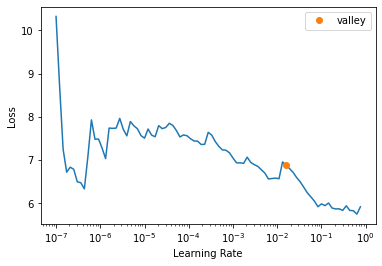

<Figure size 720x720 with 0 Axes>

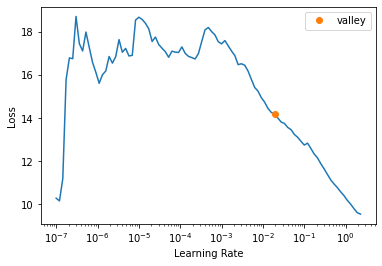

<Figure size 720x720 with 0 Axes>

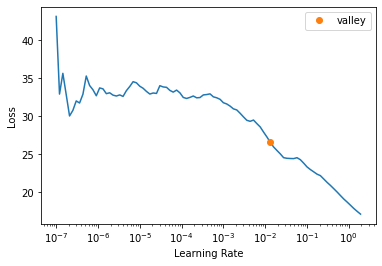

<Figure size 720x720 with 0 Axes>

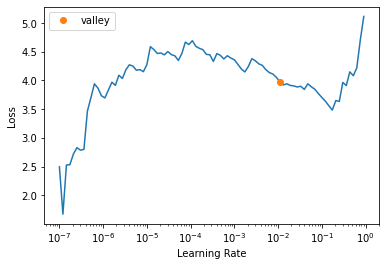

<Figure size 720x720 with 0 Axes>

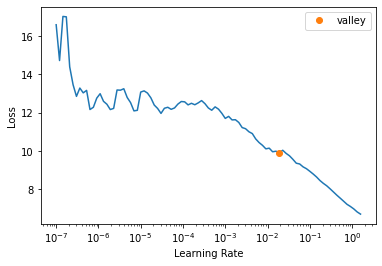

<Figure size 720x720 with 0 Axes>

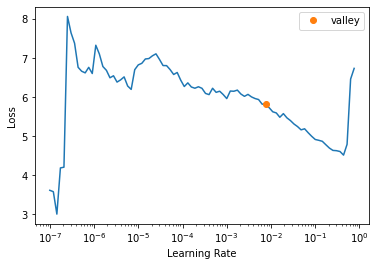

<Figure size 720x720 with 0 Axes>

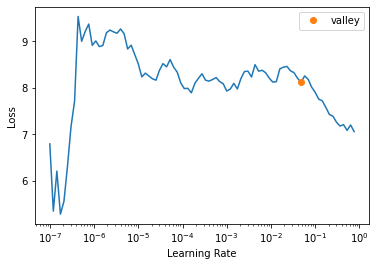

<Figure size 720x720 with 0 Axes>

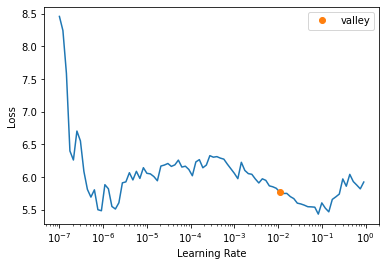

<Figure size 720x720 with 0 Axes>

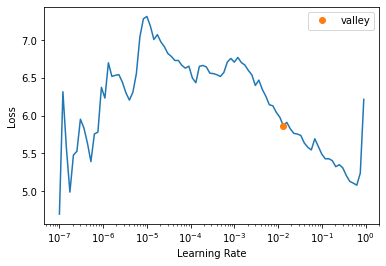

<Figure size 720x720 with 0 Axes>

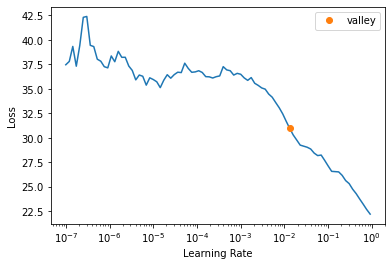

<Figure size 720x720 with 0 Axes>

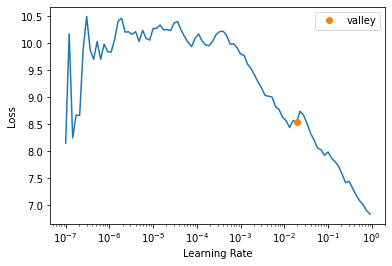

<Figure size 720x720 with 0 Axes>

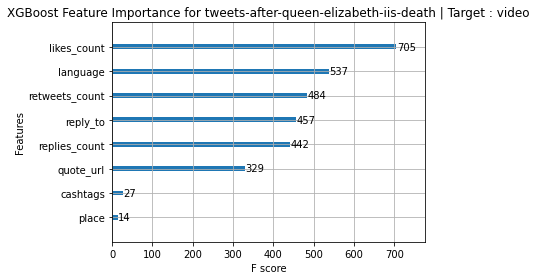

Target Variable: retweet
CATS=====================
['timezone', 'place', 'language', 'replies_count', 'retweets_count', 'likes_count', 'cashtags', 'retweet', 'quote_url', 'video', 'near', 'geo', 'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src', 'trans_dest', 'reply_to_no_dollar', 'reply_to_no_percent', 'reply_to_no_dollar_no_percent']
CONTS=====================
['created_at', 'mentions', 'urls', 'photos', 'hashtags', 'thumbnail', 'urls_no_percent']
31
Could not convert created_at to float.
Could not convert mentions to float.
Could not convert urls to float.
Could not convert photos to float.
Could not convert hashtags to float.
Could not convert thumbnail to float.
Could not convert urls_no_percent to float.
Looping through continuous variables to find breakpoint
Error with  created_at
Error with  mentions
Error with  urls
Error with  photos
Error with  hashtags
Error with  thumbnail
Error with  urls_no_percent
Continuous variables 

  0%|          | 0/42 [00:00<?, ?it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.03685450553894043}


  5%|▍         | 2/42 [00:00<00:02, 19.57it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.06503796577453613}
{'Model': 'BayesianRidge', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.06935405731201172}


 10%|▉         | 4/42 [00:00<00:02, 14.00it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.10038495063781738}
{'Model': 'DummyRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.031647682189941406}


 14%|█▍        | 6/42 [00:00<00:03, 10.21it/s]

{'Model': 'ElasticNet', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.21744084358215332}


 19%|█▉        | 8/42 [00:01<00:09,  3.56it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 1.0572774410247803}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.06168031692504883}


 21%|██▏       | 9/42 [00:01<00:08,  3.92it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.16372466087341309}
{'Model': 'GammaRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.03317570686340332}


 26%|██▌       | 11/42 [01:14<07:21, 14.26s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 0.08107313292523342, 'Time taken': 73.04176139831543}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.057848453521728516}


 31%|███       | 13/42 [01:15<04:27,  9.23s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.1595146656036377}
{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.061243295669555664}


 36%|███▌      | 15/42 [01:16<02:50,  6.32s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 2.76453699010203e-12, 'Time taken': 1.117553949356079}


 38%|███▊      | 16/42 [01:18<02:25,  5.61s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 2.665771007537842}


 40%|████      | 17/42 [01:49<04:33, 10.95s/it]

{'Model': 'KernelRidge', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 1.0000000000017737, 'Time taken': 30.21325659751892}
{'Model': 'Lars', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.08693122863769531}


 45%|████▌     | 19/42 [01:49<02:36,  6.80s/it]

LarsCV model failed to execute
x and y arrays must have at least 2 entries


 48%|████▊     | 20/42 [01:49<01:58,  5.40s/it]

{'Model': 'Lasso', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.27475571632385254}


 55%|█████▍    | 23/42 [01:50<00:50,  2.65s/it]

{'Model': 'LassoCV', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 1.0124354362487793}
{'Model': 'LassoLars', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.051232099533081055}
LassoLarsCV model failed to execute
x and y arrays must have at least 2 entries
{'Model': 'LassoLarsIC', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.05554318428039551}


 62%|██████▏   | 26/42 [01:51<00:21,  1.37s/it]

{'Model': 'LinearRegression', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.06779050827026367}
{'Model': 'LinearSVR', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 1.417432510218327e-12, 'Time taken': 0.09859037399291992}


 64%|██████▍   | 27/42 [01:54<00:27,  1.82s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 0.016389716720198184, 'Time taken': 3.3311240673065186}


 71%|███████▏  | 30/42 [02:01<00:22,  1.87s/it]

{'Model': 'NuSVR', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 5.933031843596837e-13, 'Time taken': 7.14579439163208}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.037995100021362305}
OrthogonalMatchingPursuitCV model failed to execute
attempt to get argmin of an empty sequence


 76%|███████▌  | 32/42 [02:01<00:12,  1.20s/it]

{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 0.031228613554381737, 'Time taken': 0.07498311996459961}
{'Model': 'PoissonRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.0580289363861084}


 79%|███████▊  | 33/42 [02:02<00:09,  1.02s/it]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 86%|████████▌ | 36/42 [02:02<00:03,  1.87it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.2786111831665039}
{'Model': 'Ridge', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.0328516960144043}
{'Model': 'RidgeCV', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.07316279411315918}


 95%|█████████▌| 40/42 [02:02<00:00,  3.70it/s]

{'Model': 'SGDRegressor', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 0.0020948338428490184, 'Time taken': 0.1335310935974121}
{'Model': 'SVR', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.05618095397949219}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.07513546943664551}
{'Model': 'TweedieRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.05257248878479004}


100%|██████████| 42/42 [02:03<00:00,  2.94s/it]

{'Model': 'XGBRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.35479092597961426}
{'Model': 'LGBMRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.07457137107849121}
Project: tweets-after-queen-elizabeth-iis-death
tweets-after-queen-elizabeth-iis-death
Target: retweet
retweet
Target Standard Deviation: 0.0
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
AdaBoostRegressor                            1.00       1.00  0.00        0.04
Lars                                         1.00       1.00  0.00        0.09
XGBRegressor                                 1.00       1.00  0.00        0.35
TweedieRegressor                             1.00       1.00  0.00        0.05
TransformedTargetRegressor                   1.00       1.00  0.00        0.08
SVR                                          1.00       1.00  0.00

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,1.223904,0.032058,0.179047,00:19
1,0.068531,0.001499,0.038720,00:23
2,0.101250,0.113851,0.337418,00:20


Better model found at epoch 0 with _rmse value: 0.179047092795372.
Better model found at epoch 1 with _rmse value: 0.038719695061445236.
No improvement since epoch 1: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       1       1.00
1       1       1.00
2       1       1.00
3       1       1.00
4       1       1.00
XGBoost RMSE:  0.0
XGBoost failed
Target Variable: likes_count
CATS=====================
['timezone', 'place', 'language', 'replies_count', 'retweets_count', 'likes_count', 'cashtags', 'retweet', 'quote_url', 'video', 'near', 'geo', 'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src', 'trans_dest', 'reply_to_no_dollar', 'reply_to_no_percent', 'reply_to_no_dollar_no_percent']
CONTS=====================
['created_at', 'mentions', 'urls', 'photos', 'hashtags', 'thumbnail', 'urls_no_percent']
31
Could not convert created_at to float.
Could not convert mentions to float.
Could not convert urls to float.
Could not convert photos to float.
Could not convert hashtags to float.
Could not convert thumbnail to float.
Could not convert urls_no_percent to float.
L

Traceback (most recent call last):
  File "/tmp/ipykernel_19/1746676157.py", line 323, in <module>
    plot_importance(xgb)
  File "/opt/conda/lib/python3.7/site-packages/xgboost/plotting.py", line 72, in plot_importance
    'Booster.get_score() results in empty.  ' +
ValueError: Booster.get_score() results in empty.  This maybe caused by having all trees as decision dumps.


Error with  mentions
Error with  urls
Error with  photos
Error with  hashtags
Error with  thumbnail
Error with  urls_no_percent
Continuous variables that made the cut : []
Categorical variables that made the cut : ['timezone', 'place', 'language', 'replies_count', 'retweets_count', 'likes_count', 'cashtags', 'retweet', 'quote_url', 'video', 'near', 'geo', 'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src', 'trans_dest', 'reply_to_no_dollar', 'reply_to_no_percent', 'reply_to_no_dollar_no_percent']
Tabular Object size: 19923


  2%|▏         | 1/42 [00:00<00:08,  4.91it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': -0.0687421128755723, 'Adjusted R-Squared': -0.07494945343015247, 'RMSE': 6.987733483125317, 'Time taken': 0.20363426208496094}


  5%|▍         | 2/42 [00:00<00:08,  4.63it/s]

{'Model': 'BaggingRegressor', 'R-Squared': -0.054868294620157076, 'Adjusted R-Squared': -0.06099505491719315, 'RMSE': 6.942229881904243, 'Time taken': 0.22333002090454102}
{'Model': 'BayesianRidge', 'R-Squared': 0.1743129830649025, 'Adjusted R-Squared': 0.16951732614836035, 'RMSE': 6.1419686996638205, 'Time taken': 0.07335019111633301}


 10%|▉         | 4/42 [00:00<00:05,  6.74it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': -0.2709719197170557, 'Adjusted R-Squared': -0.27835382733157377, 'RMSE': 7.620225946540234, 'Time taken': 0.1392955780029297}
{'Model': 'DummyRegressor', 'R-Squared': -0.010874863252695599, 'Adjusted R-Squared': -0.01674610614532468, 'RMSE': 6.795924879842725, 'Time taken': 0.02607893943786621}
{'Model': 'ElasticNet', 'R-Squared': 0.2618726250237464, 'Adjusted R-Squared': 0.2575855215832279, 'RMSE': 5.807183201939733, 'Time taken': 0.04077935218811035}


 17%|█▋        | 7/42 [00:01<00:05,  6.09it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.18314633432194738, 'Adjusted R-Squared': 0.17840198222331227, 'RMSE': 6.109026402832532, 'Time taken': 0.4592773914337158}
{'Model': 'ExtraTreeRegressor', 'R-Squared': -0.19403763346659098, 'Adjusted R-Squared': -0.20097270052965444, 'RMSE': 7.385992775020564, 'Time taken': 0.07970166206359863}


 21%|██▏       | 9/42 [00:02<00:13,  2.39it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': -0.048289427846041955, 'Adjusted R-Squared': -0.054377977553228485, 'RMSE': 6.920547820271679, 'Time taken': 1.6855452060699463}
{'Model': 'GammaRegressor', 'R-Squared': -1.37022343451063, 'Adjusted R-Squared': -1.3839898837514744, 'RMSE': 10.406256221264544, 'Time taken': 0.07501387596130371}


 26%|██▌       | 11/42 [01:18<06:43, 13.01s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -6140.613133429966, 'Adjusted R-Squared': -6176.284118800897, 'RMSE': 529.7135705633502, 'Time taken': 75.84822297096252}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.26371930671513455, 'Adjusted R-Squared': 0.2594429289511063, 'RMSE': 5.79991431100817, 'Time taken': 0.07260942459106445}


 31%|███       | 13/42 [01:19<04:18,  8.93s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.09043681045372254, 'Adjusted R-Squared': 0.08515399394878209, 'RMSE': 6.446386030860596, 'Time taken': 0.7284805774688721}


 33%|███▎      | 14/42 [01:19<03:24,  7.31s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.15882027750917815, 'Adjusted R-Squared': 0.15393463770683258, 'RMSE': 6.199323053284848, 'Time taken': 0.3042411804199219}


 36%|███▌      | 15/42 [01:21<02:45,  6.12s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.14756901359295227, 'Adjusted R-Squared': 0.14261802554058822, 'RMSE': 6.24064509629467, 'Time taken': 1.7144477367401123}


 38%|███▊      | 16/42 [01:24<02:19,  5.37s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.06320549912697693, 'Adjusted R-Squared': 0.05776452096534079, 'RMSE': 6.542173195543047, 'Time taken': 2.871387481689453}


 43%|████▎     | 18/42 [01:54<03:24,  8.54s/it]

{'Model': 'KernelRidge', 'R-Squared': -0.09437086050874322, 'Adjusted R-Squared': -0.10072705490058675, 'RMSE': 7.071021069708369, 'Time taken': 30.10815167427063}
{'Model': 'Lars', 'R-Squared': 0.17526535377103047, 'Adjusted R-Squared': 0.17047522830050876, 'RMSE': 6.138425517655577, 'Time taken': 0.13115978240966797}


 48%|████▊     | 20/42 [01:55<01:39,  4.54s/it]

{'Model': 'LarsCV', 'R-Squared': 0.17526535377103047, 'Adjusted R-Squared': 0.17047522830050876, 'RMSE': 6.138425517655577, 'Time taken': 0.18401098251342773}
{'Model': 'Lasso', 'R-Squared': 0.19786492186811278, 'Adjusted R-Squared': 0.19320605651532663, 'RMSE': 6.053738058994059, 'Time taken': 0.11283087730407715}


 52%|█████▏    | 22/42 [01:55<00:48,  2.42s/it]

{'Model': 'LassoCV', 'R-Squared': 0.1744772671540198, 'Adjusted R-Squared': 0.16968256441274276, 'RMSE': 6.141357646136154, 'Time taken': 0.4444313049316406}
{'Model': 'LassoLars', 'R-Squared': -0.010874863252695599, 'Adjusted R-Squared': -0.01674610614532468, 'RMSE': 6.795924879842725, 'Time taken': 0.09829163551330566}


 60%|█████▉    | 25/42 [01:55<00:16,  1.01it/s]

{'Model': 'LassoLarsCV', 'R-Squared': 0.17526535377103047, 'Adjusted R-Squared': 0.17047522830050876, 'RMSE': 6.138425517655577, 'Time taken': 0.15412569046020508}
{'Model': 'LassoLarsIC', 'R-Squared': 0.17634520151710298, 'Adjusted R-Squared': 0.1715613478895509, 'RMSE': 6.1344055967318045, 'Time taken': 0.06521749496459961}
{'Model': 'LinearRegression', 'R-Squared': 0.17395140294099254, 'Adjusted R-Squared': 0.16915364593787208, 'RMSE': 6.143313380323466, 'Time taken': 0.07480788230895996}


 62%|██████▏   | 26/42 [01:57<00:17,  1.08s/it]

{'Model': 'LinearSVR', 'R-Squared': 0.14584958674694337, 'Adjusted R-Squared': 0.1408886121245141, 'RMSE': 6.246935885422847, 'Time taken': 1.3331358432769775}


 64%|██████▍   | 27/42 [02:27<02:08,  8.54s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.07776133990274003, 'Adjusted R-Squared': 0.07240490324055904, 'RMSE': 6.491148322920738, 'Time taken': 29.80215620994568}


 71%|███████▏  | 30/42 [02:53<01:30,  7.57s/it]

{'Model': 'NuSVR', 'R-Squared': 0.3738166041857175, 'Adjusted R-Squared': 0.37017968042214977, 'RMSE': 5.348729619818134, 'Time taken': 26.36065173149109}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.17224284820807123, 'Adjusted R-Squared': 0.16743516778099699, 'RMSE': 6.149663348931106, 'Time taken': 0.03431844711303711}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.17444812683051047, 'Adjusted R-Squared': 0.1696532548398797, 'RMSE': 6.141466037802552, 'Time taken': 0.13866424560546875}


 76%|███████▌  | 32/42 [02:53<00:47,  4.71s/it]

{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.1244302258795571, 'Adjusted R-Squared': -0.130961007494514, 'RMSE': 7.16747400744886, 'Time taken': 0.09598398208618164}
{'Model': 'PoissonRegressor', 'R-Squared': -0.18075423429482096, 'Adjusted R-Squared': -0.18761215030208866, 'RMSE': 7.344794121850552, 'Time taken': 0.1403663158416748}


 79%|███████▊  | 33/42 [02:54<00:33,  3.78s/it]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 86%|████████▌ | 36/42 [02:56<00:12,  2.02s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.024719214184761862, 'Adjusted R-Squared': 0.01905470457017855, 'RMSE': 6.675206496342066, 'Time taken': 1.8577804565429688}
{'Model': 'Ridge', 'R-Squared': 0.17409744202771116, 'Adjusted R-Squared': 0.1693005332314076, 'RMSE': 6.142770310862953, 'Time taken': 0.03859424591064453}
{'Model': 'RidgeCV', 'R-Squared': 0.17445120564063243, 'Adjusted R-Squared': 0.16965635153197967, 'RMSE': 6.141454585811438, 'Time taken': 0.10507369041442871}


 88%|████████▊ | 37/42 [02:56<00:07,  1.60s/it]

{'Model': 'SGDRegressor', 'R-Squared': 0.17261378504663505, 'Adjusted R-Squared': 0.16780825905069385, 'RMSE': 6.148285292401753, 'Time taken': 0.12583470344543457}


 95%|█████████▌| 40/42 [03:13<00:06,  3.16s/it]

{'Model': 'SVR', 'R-Squared': 0.3697428655728353, 'Adjusted R-Squared': 0.366082281206213, 'RMSE': 5.366099932436457, 'Time taken': 16.84516739845276}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.17395140294099254, 'Adjusted R-Squared': 0.16915364593787208, 'RMSE': 6.143313380323466, 'Time taken': 0.062386274337768555}
{'Model': 'TweedieRegressor', 'R-Squared': 0.26371930671513455, 'Adjusted R-Squared': 0.2594429289511063, 'RMSE': 5.79991431100817, 'Time taken': 0.1257185935974121}


 98%|█████████▊| 41/42 [03:14<00:02,  2.67s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.00967466980574161, 'Adjusted R-Squared': 0.003922780261684133, 'RMSE': 6.726495, 'Time taken': 0.955451250076294}


100%|██████████| 42/42 [03:14<00:00,  4.63s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.16474041716750998, 'Adjusted R-Squared': 0.15988916201469505, 'RMSE': 6.177469423335195, 'Time taken': 0.23487067222595215}
Project: tweets-after-queen-elizabeth-iis-death
tweets-after-queen-elizabeth-iis-death
Target: likes_count
likes_count
Target Standard Deviation: 11.145374423455575
                               Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
NuSVR                                        0.37       0.37   5.35   
SVR                                          0.37       0.37   5.37   
GeneralizedLinearRegressor                   0.26       0.26   5.80   
TweedieRegressor                             0.26       0.26   5.80   
ElasticNet                                   0.26       0.26   5.81   
Lasso                                        0.19       0.20   6.05   
ElasticNetCV                                 0.18       0.18   6.11   
LassoLarsIC                   

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,126.351227,44.479027,6.669260,00:20
1,118.842796,42.072479,6.486330,00:19
2,94.694519,96.044724,9.800241,00:19


Better model found at epoch 0 with _rmse value: 6.669260025024414.
Better model found at epoch 1 with _rmse value: 6.486330032348633.
No improvement since epoch 1: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       2       1.23
1       2       1.55
2       1       1.70
3       1       1.41
4       1       1.49
XGBoost RMSE:  6.6945324


<Figure size 432x288 with 0 Axes>

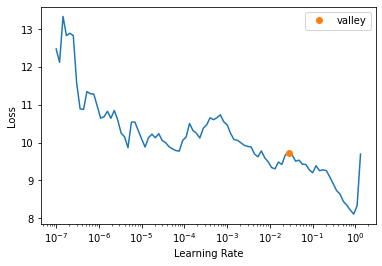

<Figure size 720x720 with 0 Axes>

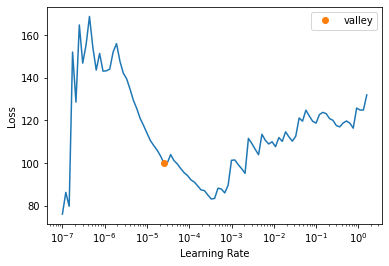

<Figure size 720x720 with 0 Axes>

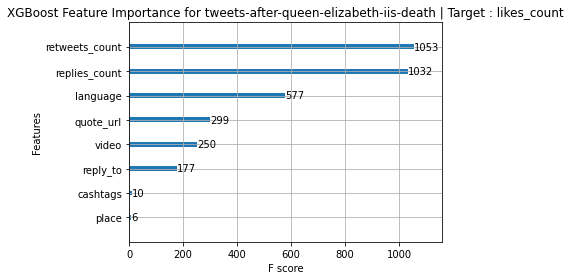

Target Variable: retweets_count
CATS=====================
['timezone', 'place', 'language', 'replies_count', 'retweets_count', 'likes_count', 'cashtags', 'retweet', 'quote_url', 'video', 'near', 'geo', 'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src', 'trans_dest', 'reply_to_no_dollar', 'reply_to_no_percent', 'reply_to_no_dollar_no_percent']
CONTS=====================
['created_at', 'mentions', 'urls', 'photos', 'hashtags', 'thumbnail', 'urls_no_percent']
31
Could not convert created_at to float.
Could not convert mentions to float.
Could not convert urls to float.
Could not convert photos to float.
Could not convert hashtags to float.
Could not convert thumbnail to float.
Could not convert urls_no_percent to float.
Looping through continuous variables to find breakpoint
Error with  created_at
Error with  mentions
Error with  urls
Error with  photos
Error with  hashtags
Error with  thumbnail
Error with  urls_no_percent
Continuous var

  2%|▏         | 1/42 [00:00<00:06,  6.32it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.03725389659801759, 'Adjusted R-Squared': 0.031662189431794, 'RMSE': 2.1283259473949028, 'Time taken': 0.15805864334106445}


 10%|▉         | 4/42 [00:00<00:05,  7.43it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 0.06430778999443265, 'Adjusted R-Squared': 0.05887321402722867, 'RMSE': 2.098209078948484, 'Time taken': 0.21654438972473145}
{'Model': 'BayesianRidge', 'R-Squared': 0.37578316460616434, 'Adjusted R-Squared': 0.3721576627844325, 'RMSE': 1.7137599676696744, 'Time taken': 0.06594252586364746}
{'Model': 'DecisionTreeRegressor', 'R-Squared': -0.3859680338505749, 'Adjusted R-Squared': -0.39401784818859564, 'RMSE': 2.553635233601892, 'Time taken': 0.13176727294921875}
{'Model': 'DummyRegressor', 'R-Squared': -0.0067888156276718625, 'Adjusted R-Squared': -0.012636326425509159, 'RMSE': 2.1764637899345525, 'Time taken': 0.02390003204345703}
{'Model': 'ElasticNet', 'R-Squared': 0.36994912923674483, 'Adjusted R-Squared': 0.36628974286615024, 'RMSE': 1.721749886532822, 'Time taken': 0.04554247856140137}


 19%|█▉        | 8/42 [00:01<00:05,  6.66it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.3788202526378608, 'Adjusted R-Squared': 0.37521239046883836, 'RMSE': 1.7095857881251484, 'Time taken': 0.45174431800842285}
{'Model': 'ExtraTreeRegressor', 'R-Squared': -0.2489756362138622, 'Adjusted R-Squared': -0.25622978763631643, 'RMSE': 2.424148598904438, 'Time taken': 0.11959028244018555}


 21%|██▏       | 9/42 [00:02<00:16,  1.98it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.058543208107955214, 'Adjusted R-Squared': 0.05307515098332982, 'RMSE': 2.1046624436378556, 'Time taken': 1.6633777618408203}
{'Model': 'GammaRegressor', 'R-Squared': 0.14801664300944672, 'Adjusted R-Squared': 0.1430682548249057, 'RMSE': 2.0021555279231187, 'Time taken': 0.07957816123962402}


 26%|██▌       | 11/42 [01:18<07:56, 15.37s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -547259.2730054804, 'Adjusted R-Squared': -550437.8048941486, 'RMSE': 1604.6459205510039, 'Time taken': 75.03630304336548}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.3724006162604795, 'Adjusted R-Squared': 0.3687554683246187, 'RMSE': 1.718397013400671, 'Time taken': 0.07519960403442383}


 31%|███       | 13/42 [01:18<04:47,  9.93s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.1914608591663115, 'Adjusted R-Squared': 0.18676479849985328, 'RMSE': 1.9504408278927317, 'Time taken': 0.7981798648834229}


 33%|███▎      | 14/42 [01:19<03:43,  8.00s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.17551827910280038, 'Adjusted R-Squared': 0.17072962264304403, 'RMSE': 1.969576123319255, 'Time taken': 0.5712316036224365}


 36%|███▌      | 15/42 [01:20<02:50,  6.31s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.351239149188715, 'Adjusted R-Squared': 0.34747109374208385, 'RMSE': 1.7471273901795183, 'Time taken': 0.57261061668396}


 38%|███▊      | 16/42 [01:22<02:20,  5.42s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.17759311955344736, 'Adjusted R-Squared': 0.17281651393469222, 'RMSE': 1.9670963045783862, 'Time taken': 2.6894924640655518}


 40%|████      | 17/42 [01:53<04:57, 11.88s/it]

{'Model': 'KernelRidge', 'R-Squared': -0.19901793502730758, 'Adjusted R-Squared': -0.20598192808428428, 'RMSE': 2.3751721628358413, 'Time taken': 30.30368447303772}
{'Model': 'Lars', 'R-Squared': 0.3759699137932888, 'Adjusted R-Squared': 0.37234549662592664, 'RMSE': 1.7135035926382385, 'Time taken': 0.07931327819824219}


 45%|████▌     | 19/42 [01:53<02:38,  6.89s/it]

{'Model': 'LarsCV', 'R-Squared': 0.376036732154472, 'Adjusted R-Squared': 0.372412703073551, 'RMSE': 1.7134118530174254, 'Time taken': 0.24638152122497559}
{'Model': 'Lasso', 'R-Squared': 0.35446990097410846, 'Adjusted R-Squared': 0.3507206099949177, 'RMSE': 1.742771717547468, 'Time taken': 0.07355690002441406}


 52%|█████▏    | 22/42 [01:53<01:09,  3.47s/it]

{'Model': 'LassoCV', 'R-Squared': 0.3760977754707504, 'Adjusted R-Squared': 0.3724741009343432, 'RMSE': 1.7133280380676656, 'Time taken': 0.4538919925689697}
{'Model': 'LassoLars', 'R-Squared': -0.0067888156276718625, 'Adjusted R-Squared': -0.012636326425509159, 'RMSE': 2.1764637899345525, 'Time taken': 0.09482145309448242}


 60%|█████▉    | 25/42 [01:54<00:28,  1.65s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.376036732154472, 'Adjusted R-Squared': 0.372412703073551, 'RMSE': 1.7134118530174254, 'Time taken': 0.16165614128112793}
{'Model': 'LassoLarsIC', 'R-Squared': 0.37613135087281435, 'Adjusted R-Squared': 0.3725078713450555, 'RMSE': 1.7132819359306295, 'Time taken': 0.059607505798339844}
{'Model': 'LinearRegression', 'R-Squared': 0.37547843844471795, 'Adjusted R-Squared': 0.37185116674881613, 'RMSE': 1.7141782227920275, 'Time taken': 0.0722513198852539}


 62%|██████▏   | 26/42 [01:55<00:26,  1.64s/it]

{'Model': 'LinearSVR', 'R-Squared': 0.2922661339934822, 'Adjusted R-Squared': 0.288155558509101, 'RMSE': 1.8248082839649233, 'Time taken': 1.5870561599731445}


 64%|██████▍   | 27/42 [02:10<01:12,  4.86s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.26254175554625714, 'Adjusted R-Squared': 0.25825853846988445, 'RMSE': 1.8627345613403186, 'Time taken': 15.023439168930054}


 67%|██████▋   | 28/42 [04:41<09:51, 42.22s/it]

{'Model': 'NuSVR', 'R-Squared': 0.24461986916902767, 'Adjusted R-Squared': 0.24023256032834284, 'RMSE': 1.8852330013412724, 'Time taken': 150.77024364471436}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.37532896445481545, 'Adjusted R-Squared': 0.37170082460190157, 'RMSE': 1.714383347598473, 'Time taken': 0.0554051399230957}


 74%|███████▍  | 31/42 [04:42<03:26, 18.80s/it]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.37577154491168663, 'Adjusted R-Squared': 0.3721459756018304, 'RMSE': 1.7137759182764454, 'Time taken': 0.2131357192993164}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.11995677307123143, 'Adjusted R-Squared': 0.11484541089462508, 'RMSE': 2.034858700304088, 'Time taken': 0.10547900199890137}


 76%|███████▌  | 32/42 [04:42<02:21, 14.16s/it]

{'Model': 'PoissonRegressor', 'R-Squared': 0.1478288466727501, 'Adjusted R-Squared': 0.14287936775191012, 'RMSE': 2.002376175869619, 'Time taken': 0.13991546630859375}


 79%|███████▊  | 33/42 [04:42<01:34, 10.53s/it]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 86%|████████▌ | 36/42 [04:44<00:27,  4.61s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.094470614372687, 'Adjusted R-Squared': 0.08921122652687186, 'RMSE': 2.0641132853846083, 'Time taken': 1.8148324489593506}
{'Model': 'Ridge', 'R-Squared': 0.37572783595191706, 'Adjusted R-Squared': 0.37210201277689037, 'RMSE': 1.7138359171845643, 'Time taken': 0.03850865364074707}
{'Model': 'RidgeCV', 'R-Squared': 0.375831530287538, 'Adjusted R-Squared': 0.3722063093775919, 'RMSE': 1.7136935734541718, 'Time taken': 0.1010894775390625}


 88%|████████▊ | 37/42 [04:44<00:17,  3.54s/it]

{'Model': 'SGDRegressor', 'R-Squared': -3427747.631699997, 'Adjusted R-Squared': -3447656.2727426984, 'RMSE': 4015.9355838496995, 'Time taken': 0.10979771614074707}


 90%|█████████ | 38/42 [04:52<00:18,  4.69s/it]

{'Model': 'SVR', 'R-Squared': 0.2586685701357013, 'Adjusted R-Squared': 0.25436285728547947, 'RMSE': 1.8676197654313973, 'Time taken': 8.07419490814209}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.37547843844471795, 'Adjusted R-Squared': 0.37185116674881613, 'RMSE': 1.7141782227920275, 'Time taken': 0.03965473175048828}
{'Model': 'TweedieRegressor', 'R-Squared': 0.3724006162604795, 'Adjusted R-Squared': 0.3687554683246187, 'RMSE': 1.718397013400671, 'Time taken': 0.05626869201660156}


 98%|█████████▊| 41/42 [04:53<00:02,  2.43s/it]

{'Model': 'XGBRegressor', 'R-Squared': -0.04815165895366702, 'Adjusted R-Squared': -0.0542394084879938, 'RMSE': 2.2207227, 'Time taken': 0.9630379676818848}


100%|██████████| 42/42 [04:54<00:00,  7.00s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.17855568556248302, 'Adjusted R-Squared': 0.17378467060489144, 'RMSE': 1.9659447976739095, 'Time taken': 0.29376220703125}
Project: tweets-after-queen-elizabeth-iis-death
tweets-after-queen-elizabeth-iis-death
Target: retweets_count
retweets_count
Target Standard Deviation: 3.7463130383927896
                               Adjusted R-Squared   R-Squared    RMSE  \
Model                                                                   
ElasticNetCV                                 0.38        0.38    1.71   
LassoLarsIC                                  0.37        0.38    1.71   
LassoCV                                      0.37        0.38    1.71   
LarsCV                                       0.37        0.38    1.71   
LassoLarsCV                                  0.37        0.38    1.71   
Lars                                         0.37        0.38    1.71   
RidgeCV                                      0.37        0.38    1.71   
Bayesian

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,13.990623,4.765474,2.182997,00:24
1,17.661818,4.467564,2.113661,00:20
2,10.358599,3.430893,1.852267,00:19
3,9.187192,4.124002,2.030764,00:19


Better model found at epoch 0 with _rmse value: 2.1829967498779297.
Better model found at epoch 1 with _rmse value: 2.113661289215088.
Better model found at epoch 2 with _rmse value: 1.8522669076919556.
No improvement since epoch 2: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       1       1.13
1       1       1.13
2       1       1.03
3       1       1.03
4       1       1.03
XGBoost RMSE:  2.214542


<Figure size 432x288 with 0 Axes>

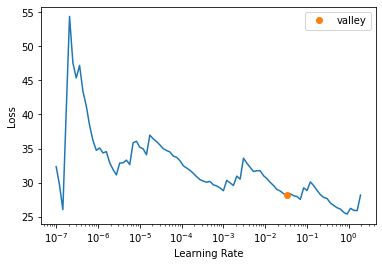

<Figure size 720x720 with 0 Axes>

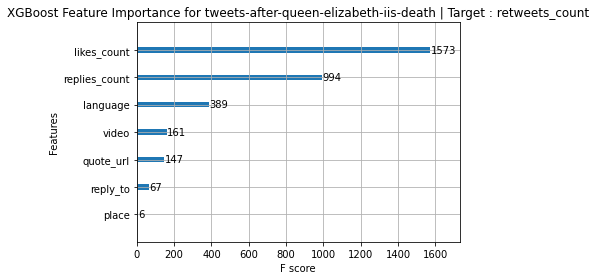

Target Variable: replies_count
CATS=====================
['timezone', 'place', 'language', 'replies_count', 'retweets_count', 'likes_count', 'cashtags', 'retweet', 'quote_url', 'video', 'near', 'geo', 'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src', 'trans_dest', 'reply_to_no_dollar', 'reply_to_no_percent', 'reply_to_no_dollar_no_percent']
CONTS=====================
['created_at', 'mentions', 'urls', 'photos', 'hashtags', 'thumbnail', 'urls_no_percent']
31
Could not convert created_at to float.
Could not convert mentions to float.
Could not convert urls to float.
Could not convert photos to float.
Could not convert hashtags to float.
Could not convert thumbnail to float.
Could not convert urls_no_percent to float.
Looping through continuous variables to find breakpoint
Error with  created_at
Error with  mentions
Error with  urls
Error with  photos
Error with  hashtags
Error with  thumbnail
Error with  urls_no_percent
Continuous vari

  2%|▏         | 1/42 [00:00<00:20,  1.99it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': -0.5791370254838029, 'Adjusted R-Squared': -0.5883087809348451, 'RMSE': 1.9300976601498407, 'Time taken': 0.5031726360321045}


  5%|▍         | 2/42 [00:00<00:13,  2.86it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 0.15328454220514487, 'Adjusted R-Squared': 0.14836675040482128, 'RMSE': 1.413312240159325, 'Time taken': 0.24084877967834473}
{'Model': 'BayesianRidge', 'R-Squared': 0.3296597559082236, 'Adjusted R-Squared': 0.32576636560162997, 'RMSE': 1.2575261434455356, 'Time taken': 0.06655287742614746}


 10%|▉         | 4/42 [00:00<00:07,  5.13it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': -0.09719014288760897, 'Adjusted R-Squared': -0.10356271189932986, 'RMSE': 1.6088306248355078, 'Time taken': 0.1371324062347412}
{'Model': 'DummyRegressor', 'R-Squared': -2.5606512810139037e-06, 'Adjusted R-Squared': -0.005810656331831199, 'RMSE': 1.5359247265364349, 'Time taken': 0.023816347122192383}
{'Model': 'ElasticNet', 'R-Squared': 0.24639121073947712, 'Adjusted R-Squared': 0.2420141899937721, 'RMSE': 1.333344437658804, 'Time taken': 0.04447174072265625}


 19%|█▉        | 8/42 [00:01<00:05,  5.81it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.3297375051925562, 'Adjusted R-Squared': 0.32584456646008875, 'RMSE': 1.2574532143668191, 'Time taken': 0.46169328689575195}
{'Model': 'ExtraTreeRegressor', 'R-Squared': -0.09915107100436882, 'Adjusted R-Squared': -0.10553502924505054, 'RMSE': 1.6102676560097935, 'Time taken': 0.12176179885864258}


 21%|██▏       | 9/42 [00:03<00:18,  1.83it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.1597886269794747, 'Adjusted R-Squared': 0.15490861142910306, 'RMSE': 1.4078735633039148, 'Time taken': 1.7717361450195312}
{'Model': 'GammaRegressor', 'R-Squared': 0.1599137817876568, 'Adjusted R-Squared': 0.15503449314652462, 'RMSE': 1.4077687035546222, 'Time taken': 0.08336710929870605}


 29%|██▊       | 12/42 [01:20<06:06, 12.22s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -70809.31499257359, 'Adjusted R-Squared': -71220.58702409611, 'RMSE': 408.7122354337638, 'Time taken': 76.45765542984009}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.28694483113167346, 'Adjusted R-Squared': 0.2828033490902666, 'RMSE': 1.2969730210859556, 'Time taken': 0.12274694442749023}


 31%|███       | 13/42 [01:20<04:34,  9.47s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.2542479750966352, 'Adjusted R-Squared': 0.24991658707320663, 'RMSE': 1.326375821903338, 'Time taken': 0.8237686157226562}


 33%|███▎      | 14/42 [01:22<03:25,  7.36s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.2460159175475961, 'Adjusted R-Squared': 0.24163671706870593, 'RMSE': 1.3336763955751634, 'Time taken': 1.2346374988555908}


 36%|███▌      | 15/42 [01:23<02:32,  5.66s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.16941382685199402, 'Adjusted R-Squared': 0.16458971524027588, 'RMSE': 1.3997862545804203, 'Time taken': 1.0103418827056885}


 38%|███▊      | 16/42 [01:25<02:04,  4.80s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.23918416356724814, 'Adjusted R-Squared': 0.23476528370917915, 'RMSE': 1.3397049066670583, 'Time taken': 2.5501904487609863}


 40%|████      | 17/42 [01:56<05:02, 12.12s/it]

{'Model': 'KernelRidge', 'R-Squared': -0.41713225216388095, 'Adjusted R-Squared': -0.4253630708001861, 'RMSE': 1.8284141226064405, 'Time taken': 30.612478494644165}
{'Model': 'Lars', 'R-Squared': 0.3298108413850428, 'Adjusted R-Squared': 0.3259183285951075, 'RMSE': 1.2573844209058391, 'Time taken': 0.04875802993774414}


 45%|████▌     | 19/42 [01:56<02:35,  6.77s/it]

{'Model': 'LarsCV', 'R-Squared': 0.32981204753185644, 'Adjusted R-Squared': 0.3259195417473193, 'RMSE': 1.2573832894410313, 'Time taken': 0.28049468994140625}
{'Model': 'Lasso', 'R-Squared': 0.16001909370463385, 'Adjusted R-Squared': 0.15514041672362555, 'RMSE': 1.407680462928745, 'Time taken': 0.08492040634155273}


 52%|█████▏    | 22/42 [01:57<01:06,  3.33s/it]

{'Model': 'LassoCV', 'R-Squared': 0.3297142347884664, 'Adjusted R-Squared': 0.32582116089961155, 'RMSE': 1.2574750425242025, 'Time taken': 0.414689302444458}
{'Model': 'LassoLars', 'R-Squared': -2.5606512810139037e-06, 'Adjusted R-Squared': -0.005810656331831199, 'RMSE': 1.5359247265364349, 'Time taken': 0.10473203659057617}


 60%|█████▉    | 25/42 [01:57<00:26,  1.56s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.32981204753185644, 'Adjusted R-Squared': 0.3259195417473193, 'RMSE': 1.2573832894410313, 'Time taken': 0.1556098461151123}
{'Model': 'LassoLarsIC', 'R-Squared': 0.32980889930675783, 'Adjusted R-Squared': 0.32591637523707495, 'RMSE': 1.2573862427326914, 'Time taken': 0.06458616256713867}
{'Model': 'LinearRegression', 'R-Squared': 0.3296562591364217, 'Adjusted R-Squared': 0.3257628485202949, 'RMSE': 1.257529423329343, 'Time taken': 0.05770444869995117}


 62%|██████▏   | 26/42 [01:59<00:25,  1.62s/it]

{'Model': 'LinearSVR', 'R-Squared': 0.17432801917419138, 'Adjusted R-Squared': 0.16953244958858704, 'RMSE': 1.3956391690687693, 'Time taken': 1.843965768814087}


 64%|██████▍   | 27/42 [02:29<02:09,  8.61s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.29335135778457666, 'Adjusted R-Squared': 0.28924708536766897, 'RMSE': 1.2911334728943618, 'Time taken': 30.430218935012817}


 67%|██████▋   | 28/42 [04:38<09:13, 39.56s/it]

{'Model': 'NuSVR', 'R-Squared': 0.13023453526002882, 'Adjusted R-Squared': 0.1251828671567412, 'RMSE': 1.43242026241467, 'Time taken': 128.92801356315613}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.32749783718535774, 'Adjusted R-Squared': 0.32359189028012125, 'RMSE': 1.2595523389977152, 'Time taken': 0.04039311408996582}


 74%|███████▍  | 31/42 [04:39<03:13, 17.57s/it]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.32979580790994023, 'Adjusted R-Squared': 0.32590320780436677, 'RMSE': 1.2573985234552003, 'Time taken': 0.16670727729797363}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.05241172803304872, 'Adjusted R-Squared': 0.04690805877667514, 'RMSE': 1.495130890777781, 'Time taken': 0.10886526107788086}


 76%|███████▌  | 32/42 [04:39<02:12, 13.23s/it]

{'Model': 'PoissonRegressor', 'R-Squared': 0.19372000624408403, 'Adjusted R-Squared': 0.18903706688641086, 'RMSE': 1.3791525854485343, 'Time taken': 0.16693997383117676}


 79%|███████▊  | 33/42 [04:39<01:28,  9.87s/it]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 86%|████████▌ | 36/42 [04:41<00:26,  4.37s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.18521634218533356, 'Adjusted R-Squared': 0.18048401285964244, 'RMSE': 1.3864063245818103, 'Time taken': 2.033688545227051}
{'Model': 'Ridge', 'R-Squared': 0.3296614486194267, 'Adjusted R-Squared': 0.32576806814423653, 'RMSE': 1.2575245557220223, 'Time taken': 0.034384965896606445}
{'Model': 'RidgeCV', 'R-Squared': 0.3296600885053129, 'Adjusted R-Squared': 0.32576670013047015, 'RMSE': 1.257525831477404, 'Time taken': 0.07251191139221191}


 88%|████████▊ | 37/42 [04:41<00:16,  3.36s/it]

{'Model': 'SGDRegressor', 'R-Squared': 0.3175544471448535, 'Adjusted R-Squared': 0.3135907482267555, 'RMSE': 1.2688298292932532, 'Time taken': 0.1386582851409912}


 90%|█████████ | 38/42 [04:50<00:18,  4.62s/it]

{'Model': 'SVR', 'R-Squared': 0.14476548311540738, 'Adjusted R-Squared': 0.1397982119314818, 'RMSE': 1.4204043258373322, 'Time taken': 8.29355525970459}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.3296562591364217, 'Adjusted R-Squared': 0.3257628485202949, 'RMSE': 1.257529423329343, 'Time taken': 0.03902602195739746}
{'Model': 'TweedieRegressor', 'R-Squared': 0.28694483113167346, 'Adjusted R-Squared': 0.2828033490902666, 'RMSE': 1.2969730210859556, 'Time taken': 0.054108381271362305}


 98%|█████████▊| 41/42 [04:51<00:02,  2.40s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.06631508667561226, 'Adjusted R-Squared': 0.06089216924973839, 'RMSE': 1.4841218, 'Time taken': 1.0229222774505615}


100%|██████████| 42/42 [04:51<00:00,  6.94s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.2162304370700988, 'Adjusted R-Squared': 0.21167824011368785, 'RMSE': 1.3597641066409, 'Time taken': 0.23752164840698242}
Project: tweets-after-queen-elizabeth-iis-death
tweets-after-queen-elizabeth-iis-death
Target: replies_count
replies_count
Target Standard Deviation: 1.9188650158470921
                               Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
LassoLarsCV                                  0.33       0.33   1.26   
LarsCV                                       0.33       0.33   1.26   
Lars                                         0.33       0.33   1.26   
LassoLarsIC                                  0.33       0.33   1.26   
OrthogonalMatchingPursuitCV                  0.33       0.33   1.26   
ElasticNetCV                                 0.33       0.33   1.26   
LassoCV                                      0.33       0.33   1.26   
Ridge                        

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,5.620761,2.635675,1.623476,00:20
1,3.766222,2.346162,1.531719,00:19
2,4.148201,2.229069,1.493007,00:20
3,5.086103,7.274000,2.697036,00:19


Better model found at epoch 0 with _rmse value: 1.623476266860962.
Better model found at epoch 1 with _rmse value: 1.5317188501358032.
Better model found at epoch 2 with _rmse value: 1.493006706237793.
No improvement since epoch 2: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       1       0.98
1       2       1.61
2       2       1.21
3       1       1.06
4       1       1.15
XGBoost RMSE:  1.4856249


<Figure size 432x288 with 0 Axes>

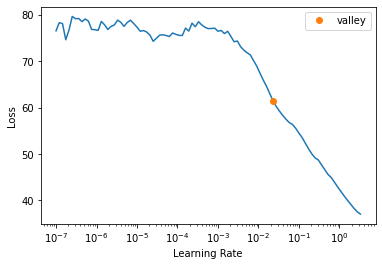

<Figure size 720x720 with 0 Axes>

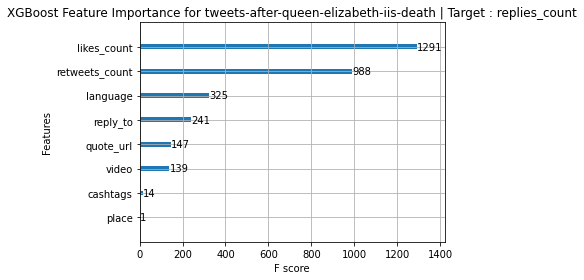

Target Variable: timezone
CATS=====================
['timezone', 'place', 'language', 'replies_count', 'retweets_count', 'likes_count', 'cashtags', 'retweet', 'quote_url', 'video', 'near', 'geo', 'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src', 'trans_dest', 'reply_to_no_dollar', 'reply_to_no_percent', 'reply_to_no_dollar_no_percent']
CONTS=====================
['created_at', 'mentions', 'urls', 'photos', 'hashtags', 'thumbnail', 'urls_no_percent']
31
Could not convert created_at to float.
Could not convert mentions to float.
Could not convert urls to float.
Could not convert photos to float.
Could not convert hashtags to float.
Could not convert thumbnail to float.
Could not convert urls_no_percent to float.
Looping through continuous variables to find breakpoint
Error with  created_at
Error with  mentions
Error with  urls
Error with  photos
Error with  hashtags
Error with  thumbnail
Error with  urls_no_percent
Continuous variables

  0%|          | 0/42 [00:00<?, ?it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.03537631034851074}


  7%|▋         | 3/42 [00:00<00:01, 20.28it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.06265974044799805}
{'Model': 'BayesianRidge', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.04952692985534668}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.047873497009277344}
{'Model': 'DummyRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.045757293701171875}


 14%|█▍        | 6/42 [00:00<00:02, 12.63it/s]

{'Model': 'ElasticNet', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.20416855812072754}


 19%|█▉        | 8/42 [00:01<00:08,  4.04it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 1.0015840530395508}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.09055066108703613}


 21%|██▏       | 9/42 [00:01<00:07,  4.41it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.1402888298034668}
{'Model': 'GammaRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.03647780418395996}


 26%|██▌       | 11/42 [01:14<07:02, 13.62s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 0.08222329574552767, 'Time taken': 73.13244581222534}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.04715251922607422}


 31%|███       | 13/42 [01:15<04:19,  8.96s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.17010760307312012}
{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.06917142868041992}


 36%|███▌      | 15/42 [01:16<02:47,  6.20s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 8.893375823901896e-13, 'Time taken': 1.1176326274871826}


 38%|███▊      | 16/42 [01:18<02:23,  5.54s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 2.7052125930786133}


 43%|████▎     | 18/42 [01:49<03:19,  8.30s/it]

{'Model': 'KernelRidge', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 0.9999999999998077, 'Time taken': 30.157094955444336}
{'Model': 'Lars', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.10935544967651367}


 45%|████▌     | 19/42 [01:49<02:24,  6.27s/it]

LarsCV model failed to execute
x and y arrays must have at least 2 entries


 48%|████▊     | 20/42 [01:49<01:43,  4.69s/it]

{'Model': 'Lasso', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.27015066146850586}


 55%|█████▍    | 23/42 [01:50<00:39,  2.09s/it]

{'Model': 'LassoCV', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.9576175212860107}
{'Model': 'LassoLars', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.046911001205444336}
LassoLarsCV model failed to execute
x and y arrays must have at least 2 entries


 60%|█████▉    | 25/42 [01:50<00:22,  1.31s/it]

{'Model': 'LassoLarsIC', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.06052875518798828}
{'Model': 'LinearRegression', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.05572223663330078}
{'Model': 'LinearSVR', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 4.870175279294876e-12, 'Time taken': 0.05907464027404785}


 64%|██████▍   | 27/42 [01:53<00:20,  1.34s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 0.0510211657959242, 'Time taken': 2.753293752670288}


 71%|███████▏  | 30/42 [02:01<00:19,  1.63s/it]

{'Model': 'NuSVR', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 9.947598300641403e-13, 'Time taken': 7.183880090713501}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.03594326972961426}
OrthogonalMatchingPursuitCV model failed to execute
attempt to get argmin of an empty sequence


 76%|███████▌  | 32/42 [02:01<00:10,  1.09s/it]

{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 0.055405894200363355, 'Time taken': 0.08077216148376465}
{'Model': 'PoissonRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.051270484924316406}


 79%|███████▊  | 33/42 [02:01<00:08,  1.06it/s]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 86%|████████▌ | 36/42 [02:02<00:03,  1.92it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.2947566509246826}
{'Model': 'Ridge', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.03781747817993164}
{'Model': 'RidgeCV', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.10973286628723145}


 93%|█████████▎| 39/42 [02:02<00:00,  3.38it/s]

{'Model': 'SGDRegressor', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.005808080808080707, 'RMSE': 0.00010784112299543685, 'Time taken': 0.14024782180786133}
{'Model': 'SVR', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.06003093719482422}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.06399202346801758}
{'Model': 'TweedieRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.09276890754699707}


100%|██████████| 42/42 [02:02<00:00,  2.92s/it]

{'Model': 'XGBRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.37825489044189453}
{'Model': 'LGBMRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.07533669471740723}
Project: tweets-after-queen-elizabeth-iis-death
tweets-after-queen-elizabeth-iis-death
Target: timezone
timezone
Target Standard Deviation: 0.0
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
AdaBoostRegressor                            1.00       1.00  0.00        0.04
Lars                                         1.00       1.00  0.00        0.11
XGBRegressor                                 1.00       1.00  0.00        0.38
TweedieRegressor                             1.00       1.00  0.00        0.09
TransformedTargetRegressor                   1.00       1.00  0.00        0.06
SVR                                          1.00       1.00  0.

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,0.859464,0.071870,0.268086,00:19
1,0.047716,0.003718,0.060976,00:25
2,0.105774,0.100625,0.317214,00:19


Better model found at epoch 0 with _rmse value: 0.2680864632129669.
Better model found at epoch 1 with _rmse value: 0.06097598373889923.
No improvement since epoch 1: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       1       1.00
1       1       1.00
2       1       1.00
3       1       1.00
4       1       1.00
XGBoost RMSE:  0.0
XGBoost failed


Traceback (most recent call last):
  File "/tmp/ipykernel_19/1746676157.py", line 323, in <module>
    plot_importance(xgb)
  File "/opt/conda/lib/python3.7/site-packages/xgboost/plotting.py", line 72, in plot_importance
    'Booster.get_score() results in empty.  ' +
ValueError: Booster.get_score() results in empty.  This maybe caused by having all trees as decision dumps.


<Figure size 432x288 with 0 Axes>

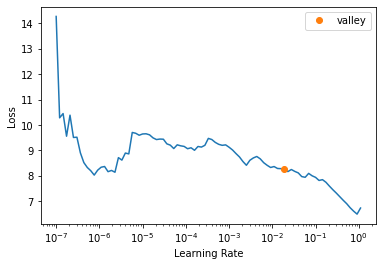

<Figure size 720x720 with 0 Axes>

In [16]:

if SEP_DOLLAR:
    #For every column in df, if the column contains a $, make a new column with the value without the $
    for col in df.columns:
        if '$' in df[col].to_string():
            df[col + '_no_dollar'] = df[col].str.replace('$', '').str.replace(',', '')


if SEP_PERCENT:
    #For every column in df, if the column contains a %, make a new column with the value without the %
    for col in df.columns:
        if '%' in df[col].to_string():
            df[col + '_no_percent'] = df[col].str.replace('%', '').str.replace(',', '')

target = ''
target_str = ''
#The column closest to the end isPARAM_DIR the target variable that can be represented as a float is the target variable
targets = []
#Loop through every possible target column (Continuous)
for i in range(len(df.columns)-1, 0, -1):
    try:
        df[df.columns[i]] = df[df.columns[i]].astype(float)
        target = df.columns[i]
        target_str = target.replace('/', '-')
    except:
        continue
    print(f'Target Variable: {target}')
    #Will be determined by the file name


    #===================================================================================================

    #Create project config files if they don't exist.
    if not os.path.exists(param_dir):
        #create param_dir
        os.makedirs(PARAM_DIR)
    if not os.path.exists(f'{PARAM_DIR}/cats.txt'):
        #create param_dir
        with open(f'{PARAM_DIR}/cats.txt', 'w') as f:
            f.write('')
    if not os.path.exists(f'{PARAM_DIR}/conts.txt'):
        #create param_dir
        with open(f'{PARAM_DIR}/conts.txt', 'w') as f:
            f.write('')
    if not os.path.exists(f'{PARAM_DIR}/cols_to_delete.txt'):
        with open(f'{PARAM_DIR}/cols_to_delete.txt', 'w') as f:
            f.write('')

    df = df.drop_duplicates()
    if SHUFFLE_DATA:
        df = df.sample(frac=1).reset_index(drop=True)

    # workaround for fastai/pytorch bug where bool is treated as object and thus erroring out.
    for n in df:
        if pd.api.types.is_bool_dtype(df[n]):
            df[n] = df[n].astype('uint8')

    with open(f'{PARAM_DIR}/cols_to_delete.txt', 'r') as f:
        cols_to_delete = f.read().splitlines()
    for col in cols_to_delete:
        try:
            del(df[col])
        except:
            pass
    #try to fill in missing values now, otherwise FastAI will do it for us later
    try:
        df = df.fillna(0)
    except:
        pass
    #print missing values
    #print(df.isna().sum().sort_values(ascending=False))
    #shrink df as much as possible
    df = df_shrink(df)


    #print types inside of df
    #print(df.dtypes)


    #Auto detect categorical and continuous variables
    #==============================================================================
    likely_cat = {}
    for var in df.columns:
        likely_cat[var] = 1.*df[var].nunique()/df[var].count() < 0.05 #or some other threshold

    cats = [var for var in df.columns if likely_cat[var]]
    conts = [var for var in df.columns if not likely_cat[var]]

    #remove target from lists
    try:
        conts.remove(target)
        cats.remove(target)
    except:
        pass
    #Convert target to float
    df[target] = df[target].astype(float)

    print('CATS=====================')
    print(cats)
    print('CONTS=====================')
    print(conts)

    #Populate categorical and continuous lists
    #==============================================================================

    if VARIABLE_FILES == True:
        with open(f'{PARAM_DIR}/cats.txt', 'r') as f:
            cats = f.read().splitlines()

        with open(f'{PARAM_DIR}/conts.txt', 'r') as f:
            conts = f.read().splitlines()

    #==============================================================================

    #==============================================================================
    procs = [Categorify, FillMissing, Normalize]
    #print(df.describe().T)
    df = df[0:SAMPLE_COUNT]
    splits = RandomSplitter()(range_of(df))

    print((len(cats)) + len(conts))
    #conts = []

    #Convert cont variables to floats
    #==============================================================================

    #Convert cont variables to floats
    #==============================================================================

    for var in conts:
        try:
            df[var] = df[var].astype(float)
        except:
            print(f'Could not convert {var} to float.')
            pass

    #==============================================================================

    #Experimental logic to add columns one-by-one to find a breakpoint
    #==============================================================================
    if ENABLE_BREAKPOINT == True:
        temp_procs = [Categorify, FillMissing]
        print('Looping through continuous variables to find breakpoint')
        cont_list = []
        for cont in conts:
            focus_cont = cont
            cont_list.append(cont)
            #print(focus_cont)
            try:
                to = TabularPandas(df, procs=procs, cat_names=cats, cont_names=cont_list, y_names=target, y_block=RegressionBlock(), splits=splits)
                del(to)
            except:
                print('Error with ', focus_cont)
                #remove focus_cont from list
                cont_list.remove(focus_cont)
                #traceback.print_exc()
                continue
        #convert all continuous variables to floats
        for var in cont_list:
            try:
                df[var] = df[var].astype(float)
            except:
                print(f'Could not convert {var} to float.')
                cont_list.remove(var)
                if CONVERT_TO_CAT == True:
                    cats.append(var)
                pass
        print(f'Continuous variables that made the cut : {cont_list}')
        print(f'Categorical variables that made the cut : {cats}')
        #shrink df as much as possible
        df = df_shrink(df)
        #print(df.dtypes)

    #==============================================================================

    #Creating tabular object + quick preprocessing
    #==============================================================================
    to = None
    if REGRESSOR == True:
        try:
            to = TabularPandas(df, procs, cats, conts, target, y_block=RegressionBlock(), splits=splits)
        except:
            conts = []
            to = TabularPandas(df, procs, cats, conts, target, y_block=RegressionBlock(), splits=splits)
    else:
        try:
            to = TabularPandas(df, procs, cats, conts, target, splits=splits)
        except:
            conts = []
            to = TabularPandas(df, procs, cats, conts, target, splits=splits)

    #print(dir(to))
    #print(to.xs)
    dls = to.dataloaders()
    print(f'Tabular Object size: {len(to)}')
    try:
        dls.one_batch()
    except:
        print(f'problem with getting one batch of {PROJECT_NAME}')
    #==============================================================================

    #Extracting train and test sets from tabular object
    #==============================================================================

    X_train, y_train = to.train.xs, to.train.ys.values.ravel()
    X_test, y_test = to.valid.xs, to.valid.ys.values.ravel()

    #Make sure target isn't in independent columns
    if target in X_train and target in X_test:
        del(X_train[target])
        del(X_test[target])
    #create dataframe from X_train and y_train
    #export tabular object to csv
    pd.DataFrame(X_train).to_csv(f'{PARAM_DIR}/X_train_{target_str}.csv', index=False)
    pd.DataFrame(X_test).to_csv(f'{PARAM_DIR}/X_test_{target_str}.csv', index=False)
    pd.DataFrame(y_train).to_csv(f'{PARAM_DIR}/y_train_{target_str}.csv', index=False)
    pd.DataFrame(y_test).to_csv(f'{PARAM_DIR}/y_test_{target_str}.csv', index=False)

    #==============================================================================

    #==============================================================================

    #Ready for model selection!

    if REGRESSOR == True:
        try:
            reg = LazyRegressor(verbose=2, ignore_warnings=False, custom_metric=None)
            models, predictions = reg.fit(X_train, X_test, y_train, y_test)
            print(f'Project: {PROJECT_NAME}')
            print(PROJECT_NAME)
            print(f'Target: {target}')
            print(target)
            target_std = y_train.std()
            print(f'Target Standard Deviation: {target_std}')
            print(models)
            models['project'] = PROJECT_NAME
            models['target'] = target
            models['target_std'] = target_std
            #rename index of 
            models.to_csv(f'{PARAM_DIR}/regression_results_{target_str}.csv', mode='a', header=True, index=True)
        except:
            print('Issue during lazypredict analysis')
    else:
        #TODO: remove this
        try:
            clf = LazyClassifier(verbose=2, ignore_warnings=False, custom_metric=None)
            models, predictions = clf.fit(X_train, X_test, y_train, y_test)
            print(f'Project: {PROJECT_NAME}')
            print(PROJECT_NAME)
            print(f'Target: {target}')
            print(target)
            print(f'Target Standard Deviation: {y_train.std()}')
            print(models)
            models.to_csv(f'{PARAM_DIR}/classification_results.csv', mode='a', header=False)
        except:
            print('Issue during lazypredict analysis')

    model_name = 'tabnet'

    # FastAI + pre-trained TabNet
    #==============================================================================
    learn = None
    i = 0
    while True:
        try:
            del learn
        except:
            pass
        try:
            learn = 0
            model = TabNetModel(get_emb_sz(to), len(to.cont_names), dls.c, n_d=64, n_a=64, n_steps=5, virtual_batch_size=256)
            # save the best model so far, determined by early stopping
            cbs = [SaveModelCallback(monitor='_rmse', comp=np.less, fname=f'{model_name}_{PROJECT_NAME}_{target_str}_best'), EarlyStoppingCallback()]
            learn = Learner(dls, model, loss_func=MSELossFlat(), metrics=rmse, cbs=cbs)
            #learn = get_learner(to)
            if(learn != 0):
                break
            if i > 50:
                break
        except:
            i += 1
            print('Error in FastAI TabNet')
            traceback.print_exc()
            continue
    try:
        #display learning rate finder results
        x = learn.lr_find()
    except:
        pass
    if AUTO_ADJUST_LEARNING_RATE == True:
        FASTAI_LEARNING_RATE = x.valley
    print(f'LEARNING RATE: {FASTAI_LEARNING_RATE}')
    try:
        if i < 50:
            learn.fit_one_cycle(20, FASTAI_LEARNING_RATE)
            plt.figure(figsize=(10, 10))
            try:
                ax = learn.show_results()
                plt.show(block=True)
            except:
                print('Could not show results')
                pass
    except:
        print('Could not fit model')
        traceback.print_exc()
        pass

    #==============================================================================

    #fit an xgboost model
    #==============================================================================
    if REGRESSOR == True:
        xgb = XGBRegressor()
    else:
        xgb = XGBClassifier()
    try:
        xgb = XGBRegressor()
        xgb.fit(X_train, y_train)
        y_pred = xgb.predict(X_test)
        print('XGBoost Predictions vs Actual==========')
        print(pd.DataFrame({'actual': y_test, 'predicted': y_pred}).head())
        print('XGBoost RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))
        #save feature importance plot to file
        plot_importance(xgb)
        plt.title(f'XGBoost Feature Importance for {PROJECT_NAME} | Target : {target}', wrap=True)
        plt.tight_layout()
        plt.show()
        plt.savefig(f'{PARAM_DIR}/xgb_feature_importance_{target_str}.png')
        fi_df = pd.DataFrame([xgb.get_booster().get_score()]).T
        fi_df.columns = ['importance']
        #create a column based off the index called feature
        fi_df['feature'] = fi_df.index
        #create a dataframe of feature importance
        fi_df = fi_df[['feature', 'importance']]
        fi_df.to_csv(f'{PARAM_DIR}/xgb_feature_importance_{target_str}.csv', index=False)
        #xgb_fi = pd.DataFrame(xgb.feature_importances_, index=X_train.columns, columns=['importance'])
        #xgb_fi.to_csv(f'{PARAM_DIR}/xgb_feature_importance_{target_str}.csv')
        #print('XGBoost AUC: ', roc_auc_score(y_test, y_pred))
    except:
        traceback.print_exc()
        print('XGBoost failed')

# <div style="text-align: center; background-color: blue; color: white; padding: 14px; line-height: 1;border-radius:20px">**Overall Feature Importance**</div>

          feature  importance
0       quote_url         329
1        reply_to         457
2     likes_count         705
3        language         537
4  retweets_count         484


<AxesSubplot:title={'center':'XGBoost Overall Feature Importance'}, xlabel='feature'>

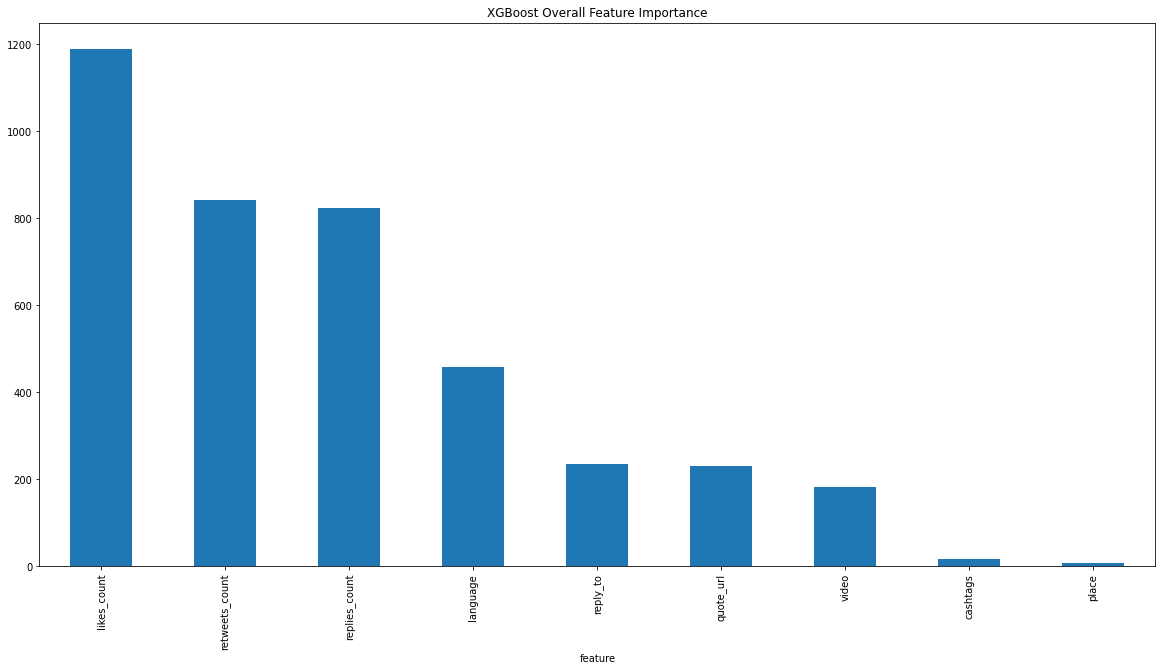

In [17]:
out_dir = f'./{PROJECT_NAME}'
xgb_feature_importance_csvs = []

for file in os.listdir(out_dir):
    if 'xgb_feature_importance' in file and '.csv' in file:
        xgb_feature_importance_csvs.append(pd.read_csv(os.path.join(out_dir, file)))

xgb_feature_importance = pd.concat(xgb_feature_importance_csvs,axis=0)
xgb_feature_importance.rename(columns={'Unnamed: 0': 'feature'}, inplace=True)
print(xgb_feature_importance.head())
xgb_feature_importance.groupby('feature')['importance'].mean().sort_values(ascending=False).plot(kind='bar', title='XGBoost Overall Feature Importance', figsize=(20, 10))

In [18]:
df.isna().sum()

created_at                       0
timezone                         0
place                            0
language                         0
mentions                         0
urls                             0
photos                           0
replies_count                    0
retweets_count                   0
likes_count                      0
hashtags                         0
cashtags                         0
retweet                          0
quote_url                        0
video                            0
thumbnail                        0
near                             0
geo                              0
source                           0
user_rt_id                       0
user_rt                          0
retweet_id                       0
reply_to                         0
retweet_date                     0
translate                        0
trans_src                        0
trans_dest                       0
reply_to_no_dollar               0
urls_no_percent     

# **To Be Continued...**